<a href="https://colab.research.google.com/github/easyforitall/chennai-house-price-prediction-using-ML-Models/blob/main/GUVI_FINAL_SUBMISSION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/sample_data/train-chennai-sale.csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


DATA - CLEANING

In [3]:
#checking for how many rows & columns
data.shape
#It has 7109 rows & 22 columns

(7109, 22)

In [4]:
# checking for null values
data.isnull().sum()
# In the data only three columns has null values

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [5]:
#checking for duplicated rows
data.duplicated().sum()
# There are no duplicated in the data

0

In [6]:
#checking for info and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [7]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [8]:
data.describe(include="O")

,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
count,7109,7109,7109,7109,7109,7109,7109,7109,7109,7109
unique,7109,17,2798,9,3,5808,5,5,5,6
top,P03210,Chrompet,06-10-2009,AdjLand,Yes,02-07-1987,House,AllPub,Paved,RL
freq,1,1681,12,1433,3587,6,2444,1886,2560,1858


In [9]:
# droping of PRT_ID becoz of unique columns & Reg fee, commis as they are known after sales price known so no use
data.drop(["PRT_ID","REG_FEE","COMMIS"],axis=1,inplace=True)

# AREA COLUMN

In [10]:
# checking column to column
data["AREA"].value_counts()
# as we observed here there was a spelling mistake words so changing them

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [11]:
data["AREA"].replace({'Chrompt':'Chrompet','Karapakam':'Karapakkam','KKNagar':'KK Nagar','Chrmpet':'Chrompet','Chormpet':'Chrompet','Velchery':'Velachery','TNagar':'T Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar',"Ana Nagar":"Anna Nagar"},inplace=True) 

In [12]:
data["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [13]:
data["AREA"].isnull().sum()

0

In [14]:
data["AREA"].dtypes 

dtype('O')

Text(0.5, 1.0, 'AREA COUNT')

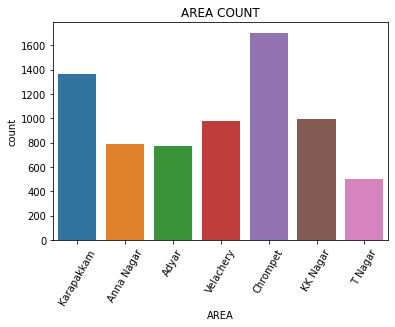

In [15]:
sns.countplot(x="AREA",data=data)
plt.xticks(rotation=60)
plt.title("AREA COUNT")
# Here we can observe that chromper area has majority of houses where T Nagar has least number of houses

#INT_SQFT COLUMN

In [16]:
data["INT_SQFT"].isnull().sum()

0

In [17]:
data["INT_SQFT"].value_counts()
# This was a continous column

1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64

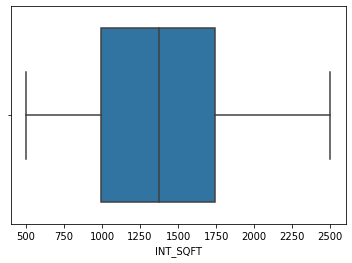

In [18]:
sns.boxplot(x="INT_SQFT",data=data)
#There are no outliers

In [19]:
data["INT_SQFT"].dtypes

dtype('int64')

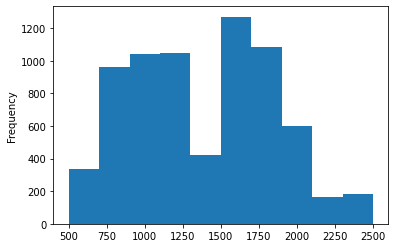

In [20]:
data["INT_SQFT"].plot(kind="hist")
# It was a not a uniform distribution there was a some heights & downs

# DIST_MAINROAD

In [21]:
data["DIST_MAINROAD"].value_counts()
#continous variable/column

39     56
51     53
78     52
77     49
73     48
       ..
33     24
136    24
167    24
12     23
25     20
Name: DIST_MAINROAD, Length: 201, dtype: int64

In [22]:
data["DIST_MAINROAD"].isnull().sum()
# No Null values from this column

0

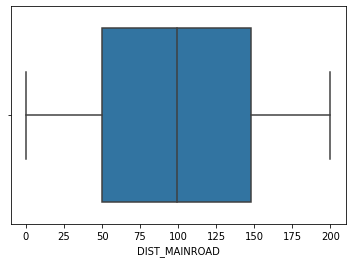

In [23]:
sns.boxplot(x="DIST_MAINROAD",data=data)
# there was no outliers

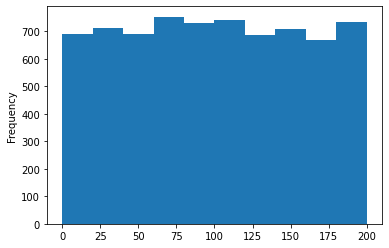

In [24]:
data["DIST_MAINROAD"].plot(kind="hist")
#It was a uniform distribution

#N_BEDROOM COLUMN

In [25]:
data["N_BEDROOM"].value_counts()
# so it is a categorical variable

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [26]:
data["N_BEDROOM"].isnull().sum()
# so there was one null row as it is a categorical column replace it with column mode

1

In [27]:
data["N_BEDROOM"].fillna(1,inplace=True)

In [28]:
data["N_BEDROOM"].isnull().sum()

0

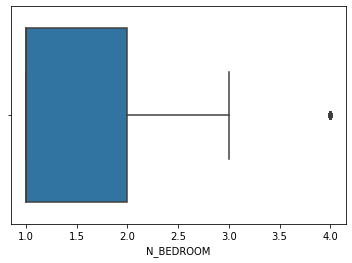

In [29]:
sns.boxplot(x="N_BEDROOM",data=data)
# There was no outliers but majority lies in range of(1,3)

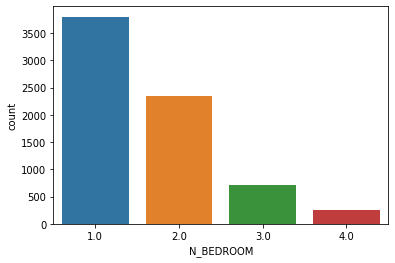

In [30]:
sns.countplot(x="N_BEDROOM",data=data)
# As we observed here majority of bedrooms were are only 1 bedrooms houses and least are 4 bedrooms houses

#N_BATHROOM COLUMN

In [31]:
data["N_BATHROOM"].value_counts()
# categorical variable

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [32]:
data["N_BATHROOM"].isnull().sum()
# No Null values

5

In [33]:
a = data["N_BATHROOM"].mode()
a[0]

1.0

In [34]:
data["N_BATHROOM"].fillna(a[0],inplace=True)

In [35]:
data["N_BATHROOM"].isnull().sum()

0

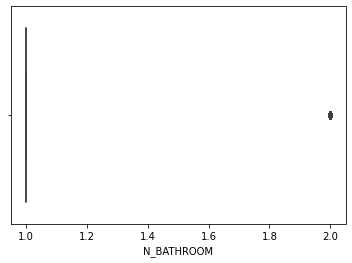

In [36]:
sns.boxplot(x="N_BATHROOM",data=data)
#There was no outliers but majority lies in 1

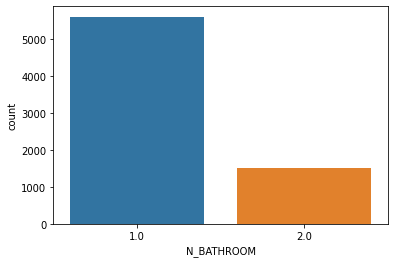

In [37]:
sns.countplot(x="N_BATHROOM",data=data)
# Majority of houses has 1 bathroom

#N_ROOM COLUMN

In [38]:
data["N_ROOM"].value_counts()
# categorical column

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [39]:
data["N_ROOM"].isnull().sum()

0

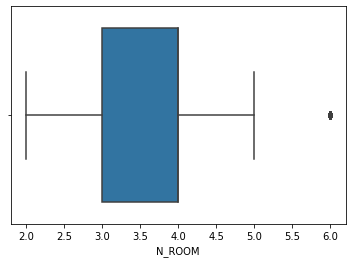

In [40]:
sns.boxplot(x="N_ROOM",data=data)
# here 6 was the outlier but was a good outlier

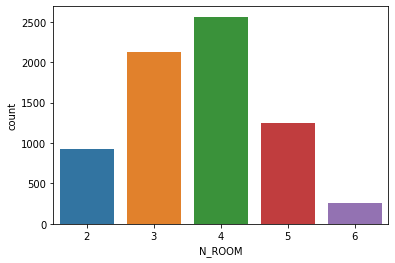

In [41]:
sns.countplot(x="N_ROOM",data=data)
# As we observe here majority of houses has 4 rooms

# SALES_COND

In [42]:
data["SALE_COND"].value_counts()
# As we observe here there was a miss spell words 

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [43]:
dic = {'Ab Normal':"AbNormal","Partiall":"Partial","Adj Land":"AdjLand","PartiaL1":"Partial"}
data["SALE_COND"].replace(dic,inplace=True)
data["SALE_COND"].value_counts()
data["SALE_COND"].replace({"PartiaLl":"Partial"},inplace=True)

In [44]:
data["SALE_COND"].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [45]:
data["SALE_COND"].isnull().sum()
# No null values

0

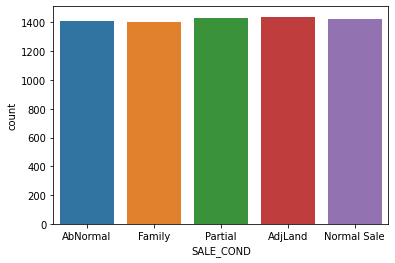

In [46]:
sns.countplot(x="SALE_COND",data=data)
# As we observe here all are almost same but compare to all AdjLand plays little higher

#PARK_FACIL

In [47]:
data["PARK_FACIL"].value_counts()
# there are miss spell words have to correct them

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [48]:
data["PARK_FACIL"].replace({"Noo":"No"},inplace=True)

In [49]:
data["PARK_FACIL"].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [50]:
data["PARK_FACIL"].isnull().sum()

0

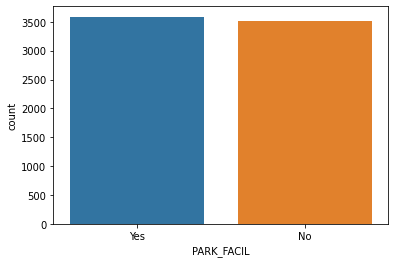

In [51]:
sns.countplot(x="PARK_FACIL",data=data)
# Most of the houses has park_facility as compare to No park_facil

#BUILDTYPE

In [52]:
data["BUILDTYPE"].value_counts()
# here also there was some misspell words

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [53]:
data["BUILDTYPE"].replace({"Comercial":"Commercial","Other":"Others"},inplace=True)

In [54]:
data["BUILDTYPE"].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [55]:
data["BUILDTYPE"].isnull().sum()

0

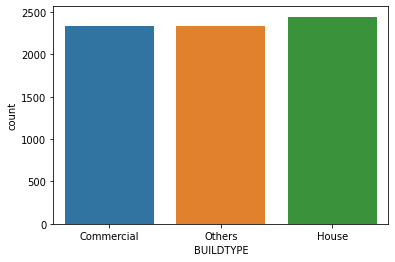

In [56]:
sns.countplot(x="BUILDTYPE",data=data)
# Most of the areas has buildtype as house but all are llrly same

#UTILITY_AVAIL

In [57]:
data["UTILITY_AVAIL"].value_counts()
# There are some mis spell words

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [58]:
data["UTILITY_AVAIL"].replace({"All Pub":"AllPub","NoSewr":"NoSeWa"},inplace=True)
data["UTILITY_AVAIL"].replace({"NoSewr ":"NoSeWa"},inplace=True)

In [59]:
data["UTILITY_AVAIL"].value_counts()

NoSeWa    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [60]:
data["UTILITY_AVAIL"].isnull().sum()

0

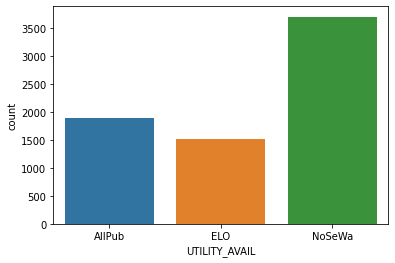

In [61]:
sns.countplot(x="UTILITY_AVAIL",data=data)
# Majority areas has utility_Avail as NoSeWa

#STREET

In [62]:
data["STREET"].value_counts()
# There are some mis spell words

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [63]:
data["STREET"].replace({"Pavd":"Paved","NoAccess":"No Access"},inplace=True)

In [64]:
data["STREET"].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [65]:
data["STREET"].isnull().sum()

0

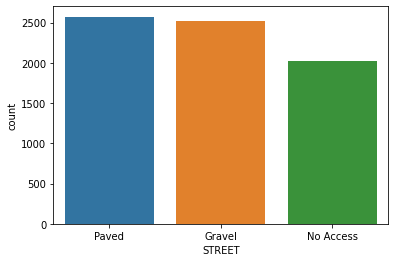

In [66]:
sns.countplot(x="STREET",data=data)

#MZZONE

In [67]:
data["MZZONE"].value_counts()
# so there are no null values

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [68]:
data["MZZONE"].isnull().sum()

0

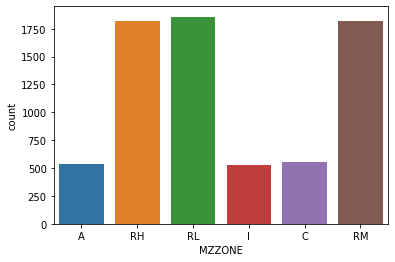

In [69]:
sns.countplot(x="MZZONE",data=data)
# many houses has in lower residential area

#QS_ROOMS

In [70]:
data["QS_ROOMS"].value_counts()
# so this was continous numerical column

2.5    265
3.8    259
3.6    255
4.6    252
3.9    245
4.9    242
3.4    240
4.7    239
3.3    239
4.8    239
4.2    239
2.6    237
2.1    236
3.1    230
5.0    228
3.0    228
3.5    227
2.8    226
4.3    225
2.3    224
4.1    222
2.9    220
4.4    219
4.5    218
4.0    218
2.2    213
2.4    208
3.2    208
3.7    205
2.0    203
2.7    200
Name: QS_ROOMS, dtype: int64

In [71]:
data["QS_ROOMS"].isnull().sum()

0

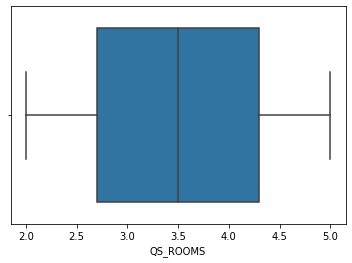

In [72]:
sns.boxplot(x="QS_ROOMS",data=data)
# no outliers

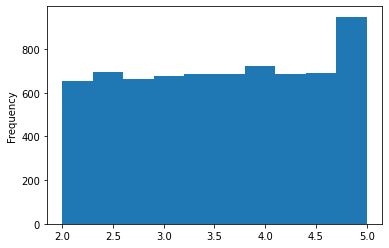

In [73]:
data["QS_ROOMS"].plot(kind="hist")
# So many houses has 3 bedrooms and least houses has 5 bedrooms

#QS_BEDROOM

In [74]:
data["QS_BEDROOM"].value_counts()
# This is a continous numerical columns

2.6    273
3.2    253
4.0    248
2.4    244
3.8    244
3.1    243
2.1    242
3.0    241
3.4    239
4.3    237
4.4    237
3.5    237
2.2    237
3.3    234
4.6    233
4.7    228
4.5    227
2.5    226
3.6    225
4.1    223
2.7    222
2.0    221
3.9    220
2.9    219
5.0    217
4.2    212
4.8    211
2.8    210
3.7    203
4.9    203
2.3    200
Name: QS_BEDROOM, dtype: int64

In [75]:
data["QS_BEDROOM"].isnull().sum()

0

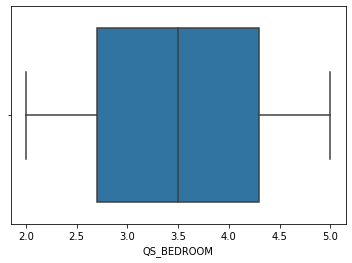

In [76]:
sns.boxplot(x="QS_BEDROOM",data=data)
# so there was no outliers

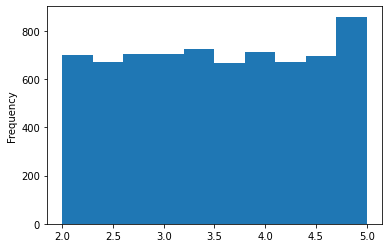

In [77]:
data["QS_BEDROOM"].plot(kind="hist")

#QS_BATHROOM

In [78]:
data["QS_BATHROOM"].value_counts()

2.7    256
4.8    255
3.7    251
4.7    247
4.9    245
3.0    241
4.2    237
4.6    234
3.4    234
2.2    234
2.5    233
4.0    232
3.1    232
4.5    231
2.4    230
2.9    228
3.3    227
3.2    226
2.6    226
3.5    225
2.1    224
4.3    224
2.0    222
3.6    221
2.3    220
4.4    219
5.0    219
3.9    211
4.1    210
3.8    209
2.8    206
Name: QS_BATHROOM, dtype: int64

In [79]:
data["QS_BATHROOM"].isnull().sum()

0

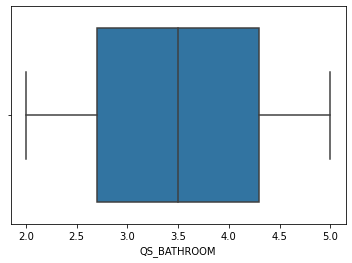

In [80]:
sns.boxplot(x="QS_BATHROOM",data=data)
#There was no outliers

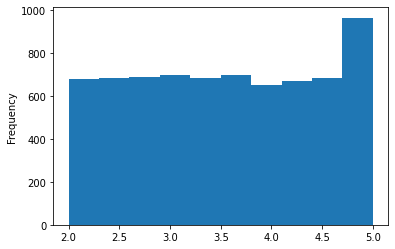

In [81]:
data["QS_BATHROOM"].plot(kind="hist")

#QS_OVERALL

In [82]:
data["QS_OVERALL"].unique()
# As it is showing values in discrete but in column it was continous so filling null values with mean if there are no outliers

array([4.33 , 3.765, 3.09 , 4.01 , 3.29 , 3.32 , 2.67 , 3.26 , 3.55 ,
       3.16 , 3.83 , 2.89 , 2.26 , 3.19 , 3.66 ,   nan, 3.57 , 4.3  ,
       3.35 , 4.76 , 3.39 , 3.43 , 3.73 , 3.59 , 3.74 , 2.29 , 3.17 ,
       4.18 , 2.755, 2.11 , 2.605, 4.58 , 4.2  , 3.27 , 4.19 , 2.98 ,
       3.12 , 3.08 , 3.85 , 3.42 , 3.2  , 4.   , 3.34 , 2.825, 3.46 ,
       4.07 , 3.68 , 2.95 , 3.505, 2.97 , 3.63 , 3.76 , 3.77 , 2.78 ,
       3.985, 3.04 , 2.88 , 4.21 , 2.42 , 3.8  , 2.54 , 3.84 , 2.395,
       3.14 , 2.49 , 3.175, 2.84 , 4.17 , 3.13 , 3.98 , 3.36 , 3.735,
       2.62 , 4.61 , 2.6  , 4.09 , 3.18 , 3.425, 3.71 , 3.21 , 3.61 ,
       2.9  , 3.94 , 4.145, 4.26 , 4.16 , 3.5  , 3.22 , 3.99 , 4.12 ,
       2.475, 2.28 , 2.725, 4.03 , 3.07 , 2.81 , 3.45 , 3.9  , 3.87 ,
       3.1  , 2.93 , 3.05 , 3.54 , 2.63 , 3.11 , 3.89 , 3.33 , 3.96 ,
       3.56 , 4.39 , 3.58 , 3.47 , 3.88 , 4.04 , 3.6  , 4.53 , 3.72 ,
       2.96 , 3.4  , 3.51 , 4.215, 3.055, 3.06 , 3.53 , 3.435, 3.41 ,
       3.86 , 3.62 ,

In [83]:
data["QS_OVERALL"].isnull().sum()

48

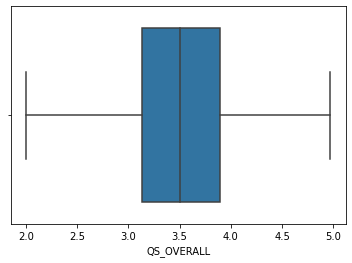

In [84]:
sns.boxplot(x="QS_OVERALL",data=data)
# These are useful outliers doesnot skew the data

In [85]:
data["QS_OVERALL"].fillna(data["QS_OVERALL"].dropna().mean(),inplace=True)

In [86]:
data["QS_OVERALL"].isnull().sum()

0

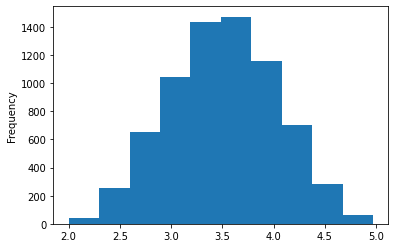

In [87]:
data["QS_OVERALL"].plot(kind="hist")
# It was discrete numerical

In [88]:
data["QS_OVERALL"].mean()

3.503253788415239

In [89]:
data["QS_OVERALL"].median()

3.5032537884152384

In [90]:
data["QS_OVERALL"].mode()
# So mean,mode,median is same

0    3.54
dtype: float64

# CONVERTING DATA TYPES

In [91]:
data.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [92]:
#converting datatypes for datecolumns
def change_into_datetime(col):
  data[col] = pd.to_datetime(data[col])
for i in ["DATE_SALE","DATE_BUILD"]:
  change_into_datetime(i)

In [93]:
#converting floats into int
def float_int(col):
  data[col] = data[col].dropna().astype("int")
for i in ["N_BEDROOM","N_BATHROOM","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"]:
  float_int(i)

In [94]:
data.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                  int64
QS_BATHROOM               int64
QS_BEDROOM                int64
QS_OVERALL                int64
SALES_PRICE               int64
dtype: object

# FEATURE EXTRACTION & EDA(EXPLORATORY DATA ANALYSIS)

In [95]:
# from date_sale & date_build we can extract age of building
data["Age Of Building"] = data["DATE_SALE"].dt.year - data["DATE_BUILD"].dt.year
data.drop(["DATE_SALE","DATE_BUILD"],axis=1,inplace=True)

In [96]:
data_categorical = []
data_numerical = []
for i in data.columns:
  if data[i].dtypes=='object':
    data_categorical.append(i)
  else:
    data_numerical.append(i)

In [97]:
data_categorical

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [98]:
data_numerical

['INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'SALES_PRICE',
 'Age Of Building']

In [99]:
pd.set_option("display.max_rows",7110)
pd.set_option("display.max_columns",22)
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age Of Building
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4,3,4,4,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4,4,2,3,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSeWa,Paved,I,4,3,3,4,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3,2,4,3,7406250,30


#CHECKING THE CATEGORICAL RELATION WITH TARGET VARIABLE

In [ ]:
def categorical_target_relation(col):
  sns.barplot(x=data[col],y=data.SALES_PRICE,order=data.groupby(col)['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')[col])

Text(0.5, 1.0, 'AREA VS SALES PRICE')

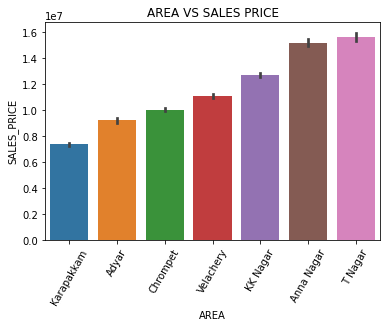

In [ ]:
categorical_target_relation("AREA")
plt.xticks(rotation=60)
plt.title("AREA VS SALES PRICE")
# As we observed has T Nagar Area has Average highest sales and Karapakkam area has least saleprice
# There was a linear relation ship with the target variable

Text(0.5, 1.0, 'SALE_COND VS SALES PRICE')

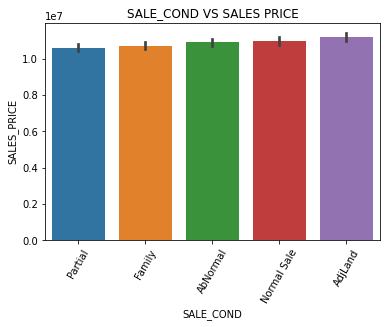

In [ ]:
categorical_target_relation("SALE_COND")
plt.xticks(rotation=60)
plt.title("SALE_COND VS SALES PRICE")
# As we observe here sales_cond has no relation with the target variables so we can drop thet column

Text(0.5, 1.0, 'PARK_FACIL VS SALES PRICE')

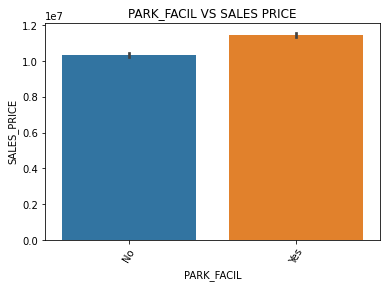

In [ ]:
categorical_target_relation("PARK_FACIL")
plt.xticks(rotation=60)
plt.title("PARK_FACIL VS SALES PRICE")
# This also has a linear relation ship with the target variables

Text(0.5, 1.0, 'BUILDTYPE VS SALES PRICE')

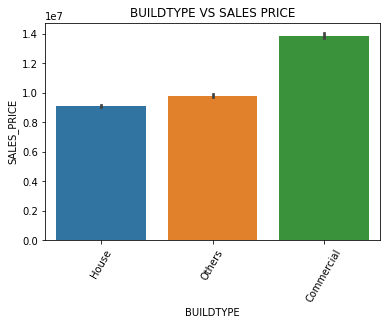

In [ ]:
categorical_target_relation("BUILDTYPE")
plt.xticks(rotation=60)
plt.title("BUILDTYPE VS SALES PRICE")
# This has a relation ship with target variables but not linear relationship

Text(0.5, 1.0, 'UTILITY_AVAIL VS SALES PRICE')

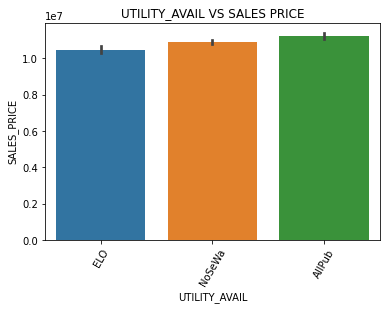

In [ ]:
categorical_target_relation("UTILITY_AVAIL")
plt.xticks(rotation=60)
plt.title("UTILITY_AVAIL VS SALES PRICE")
# This has a less linear relationship with the target variable

Text(0.5, 1.0, 'STREET VS SALES PRICE')

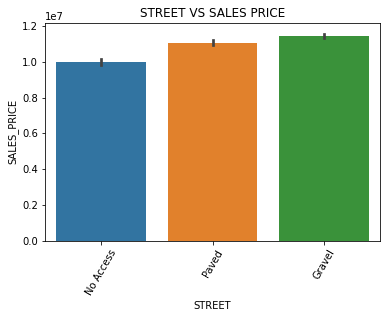

In [ ]:
categorical_target_relation("STREET")
plt.xticks(rotation=60)
plt.title("STREET VS SALES PRICE")
# This also has a veryless linear relationship with the target variable

Text(0.5, 1.0, 'MZZONE VS SALES PRICE')

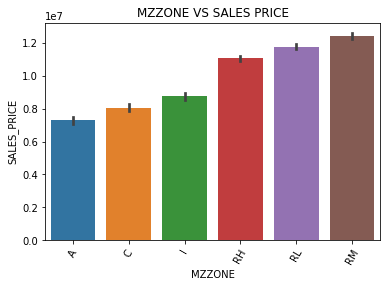

In [ ]:
categorical_target_relation("MZZONE")
plt.xticks(rotation=60)
plt.title("MZZONE VS SALES PRICE")
# This has a string linear relationship with the target variable

In [ ]:
def multi_categorical_target(col):
  saleby = data.groupby(["AREA",col])
  salegroup = saleby["SALES_PRICE"].mean().sort_values(ascending=False)
  salegroup.plot(kind="bar")

Text(0.5, 1.0, 'AREA VS SALES_COND')

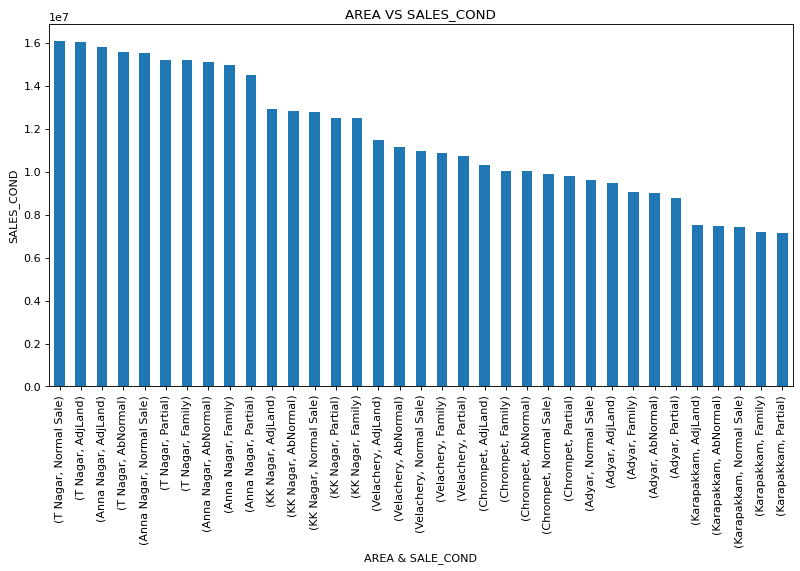

In [ ]:
plt.figure(figsize=(12,6),dpi=80)
multi_categorical_target("SALE_COND")
plt.xticks(rotation=90)
plt.xlabel("AREA & SALE_COND")
plt.ylabel("SALES_COND")
plt.title("AREA VS SALES_COND")
# from this T Nagar Normal Sale has highest average sales price & Karapakkam Partial has least averages sales

Text(0.5, 1.0, 'AREA VS PARK_FACIL')

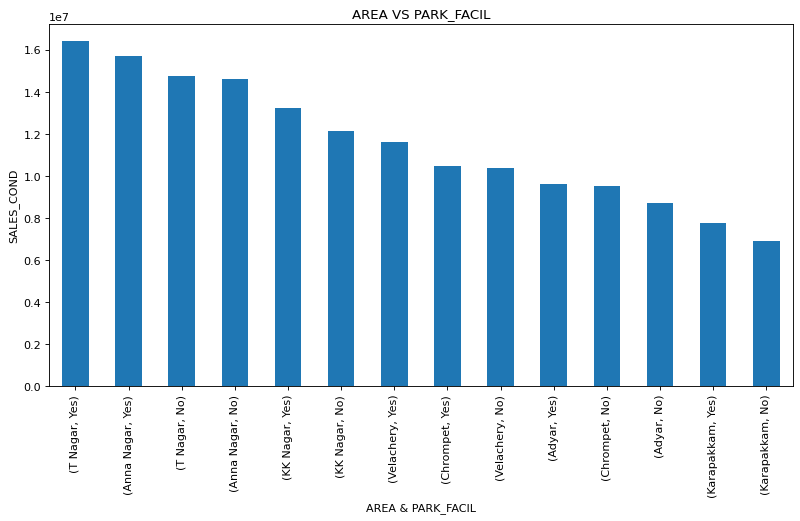

In [ ]:
plt.figure(figsize=(12,6),dpi=80)
multi_categorical_target("PARK_FACIL")
plt.xticks(rotation=90)
plt.xlabel("AREA & PARK_FACIL")
plt.ylabel("SALES_COND")
plt.title("AREA VS PARK_FACIL")
# so T Nagar with park facility has highest average sales & karapakka with no park facil has least averages sales

Text(0.5, 1.0, 'AREA VS BUILDTYPE')

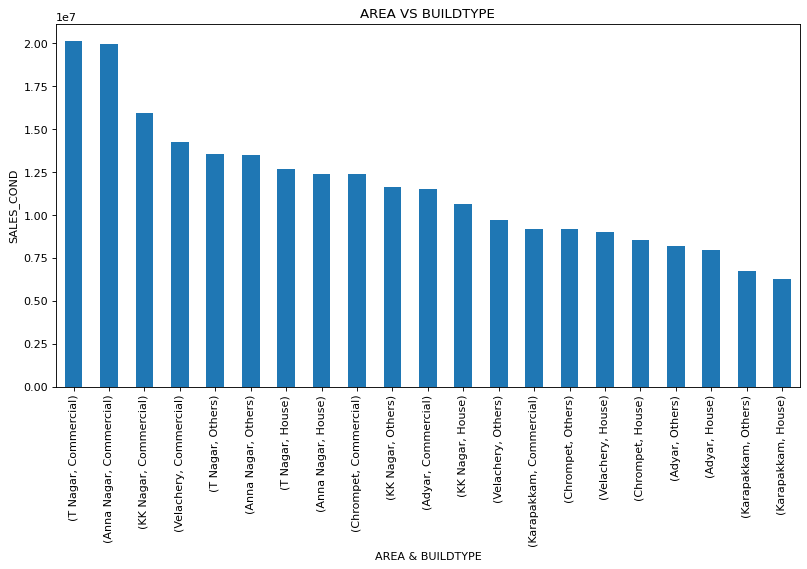

In [ ]:
plt.figure(figsize=(12,6),dpi=80)
multi_categorical_target("BUILDTYPE")
plt.xticks(rotation=90)
plt.xlabel("AREA & BUILDTYPE")
plt.ylabel("SALES_COND")
plt.title("AREA VS BUILDTYPE")
# T Nagar with commercial buildtype has highest average sales and karapakkam house buildtype has least average salesprice

Text(0.5, 1.0, 'AREA VS UTILITY_AVAIL')

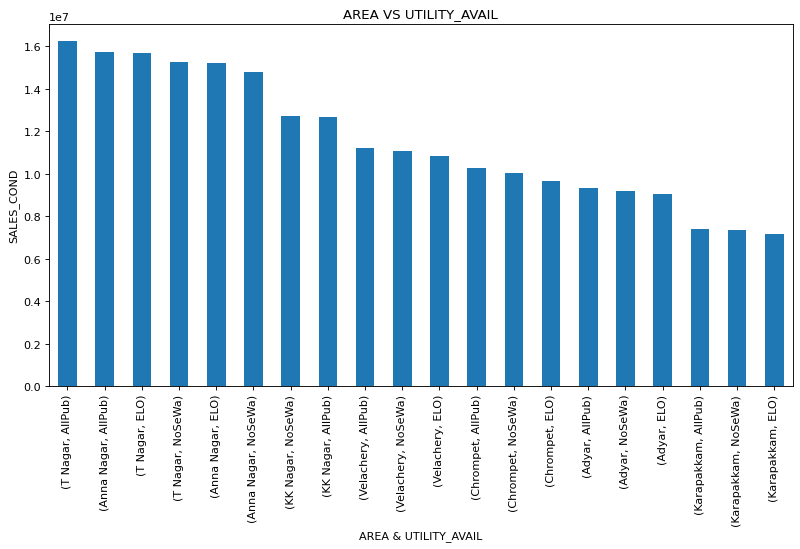

In [ ]:
plt.figure(figsize=(12,6),dpi=80)
multi_categorical_target("UTILITY_AVAIL")
plt.xticks(rotation=90)
plt.xlabel("AREA & UTILITY_AVAIL")
plt.ylabel("SALES_COND")
plt.title("AREA VS UTILITY_AVAIL")
#TNagar with AllPub utilty_avail has average highest sales price & Karapakkam ELO has leat average sales price

Text(0.5, 1.0, 'AREA VS STREET')

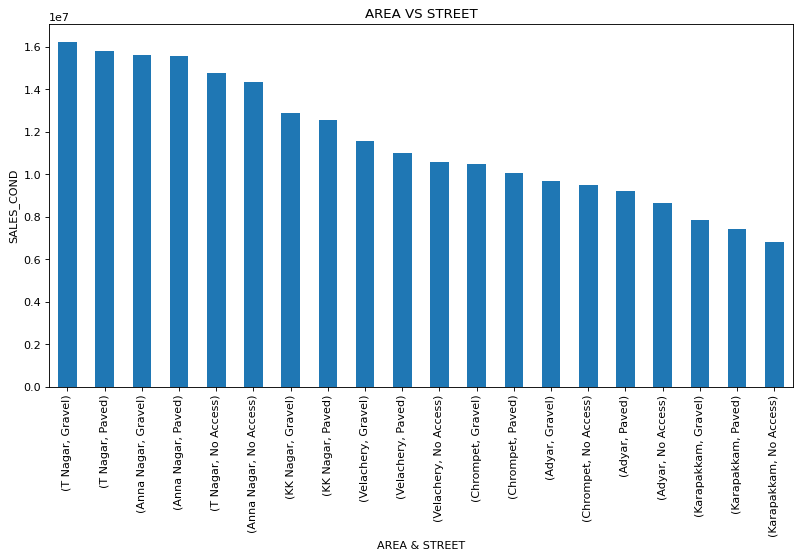

In [ ]:
plt.figure(figsize=(12,6),dpi=80)
multi_categorical_target("STREET")
plt.xticks(rotation=90)
plt.xlabel("AREA & STREET")
plt.ylabel("SALES_COND")
plt.title("AREA VS STREET")
# T Nagar Gravel street has highest average sales price where Karapakkam No access has least average sales price

Text(0.5, 1.0, 'AREA VS MZZONE')

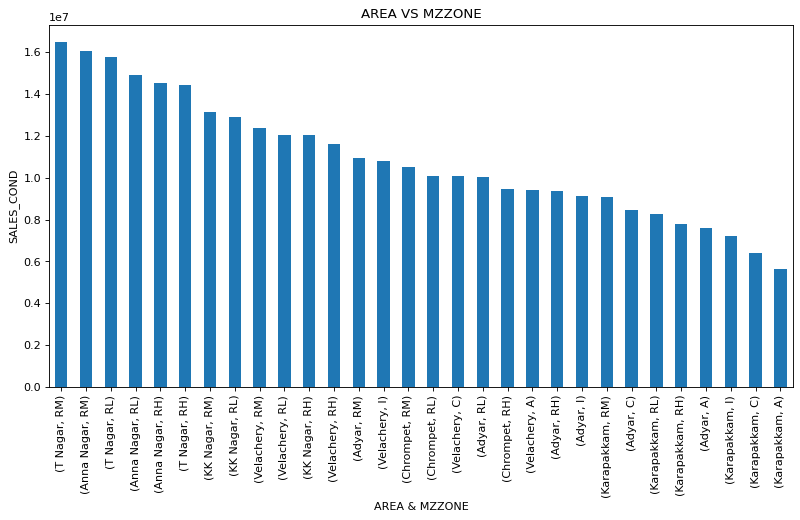

In [ ]:
plt.figure(figsize=(12,6),dpi=80)
multi_categorical_target("MZZONE")
plt.xticks(rotation=90)
plt.xlabel("AREA & MZZONE")
plt.ylabel("SALES_COND")
plt.title("AREA VS MZZONE")
# T Nagar with regional medium has highest average sales where Karapakkam A zone has least sales price

NOTE : T NAGAR - RM ZONE - GRAVEL STREET - ALLPUB UTILITY_AVAIL - COMMERCIAL BUILDTYPE - NORMAL SALE COND - WITH PARK_FACIL HAS HIGHEST AVERAGE SALES 

#CHECKING THE CONTINOUS NUMERICAL RELATION WITH TARGET VARIABLE

In [ ]:
def correlation(a):
  fig,(ax1,ax2,ax3,ax4,ax5,ax6)= plt.subplots(1,6,figsize=(15,5),sharey=False,dpi=120)
  data.plot(x = a,y="SALES_PRICE",kind="scatter",ax=ax1,color='r')
  ax1.set_xlabel(a)
  ax1.set_ylabel("SALES_PRICE")
  ax1.set_title("REALTION BEFORE TRANSFORMING",fontsize=8,rotation=60)
  print("\n")
  data['transform'] = np.power(data[a],2)
  data.plot(x = "transform",y="SALES_PRICE",kind="scatter",ax=ax2,color='b')
  ax2.set_xlabel(a)
  ax2.set_ylabel("SALES_PRICE")
  ax2.set_title("correlation after transforming into power(2):",fontsize=8,rotation=60)
  print("\n")
  data['transform1'] = np.power(data[a],3)
  data.plot(x = "transform1",y="SALES_PRICE",kind="scatter",ax=ax3,color='r')
  ax3.set_xlabel(a)
  ax3.set_ylabel("SALES_PRICE")
  ax3.set_title("correlation after transforming into power(3):",fontsize=8,rotation=60)
  print("\n")
  data['transform2'] = np.power(data[a],1/2)
  data.plot(x = "transform2",y="SALES_PRICE",kind="scatter",ax=ax4,color='b')
  ax4.set_xlabel(a)
  ax4.set_ylabel("SALES_PRICE")
  ax4.set_title("correlation after transforming into sqrt(x):",fontsize=8,rotation=60)
  print("\n")
  data['transform3'] = np.log(data[a])
  data.plot(x = "transform3",y="SALES_PRICE",kind="scatter",ax=ax5,color='r')
  ax5.set_xlabel(a)
  ax5.set_ylabel("SALES_PRICE")
  ax5.set_title("correlation after transforming into log(x):",fontsize=8,rotation=60)
  print("\n")
  data['transform4'] = np.exp(data[a])
  data.plot(x = "transform4",y="SALES_PRICE",kind="scatter",ax=ax6,color='b')
  ax5.set_xlabel(a)
  ax5.set_ylabel("SALES_PRICE")
  ax5.set_title("correlation after transforming into exp(x):",fontsize=8,rotation=60)

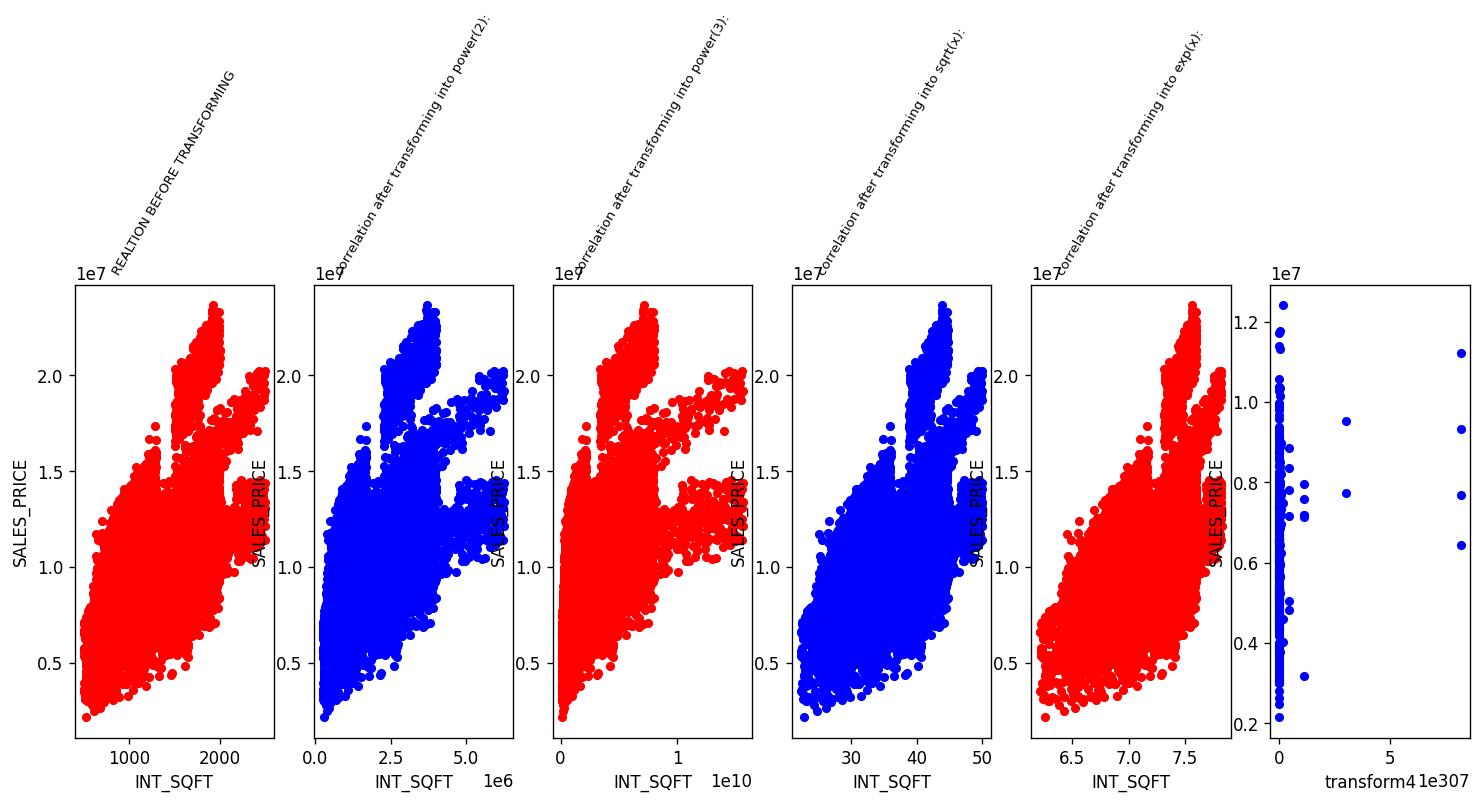

In [ ]:
correlation("INT_SQFT")
# here we observed that there was a linear relation ship between sales_price & INT_SQFT

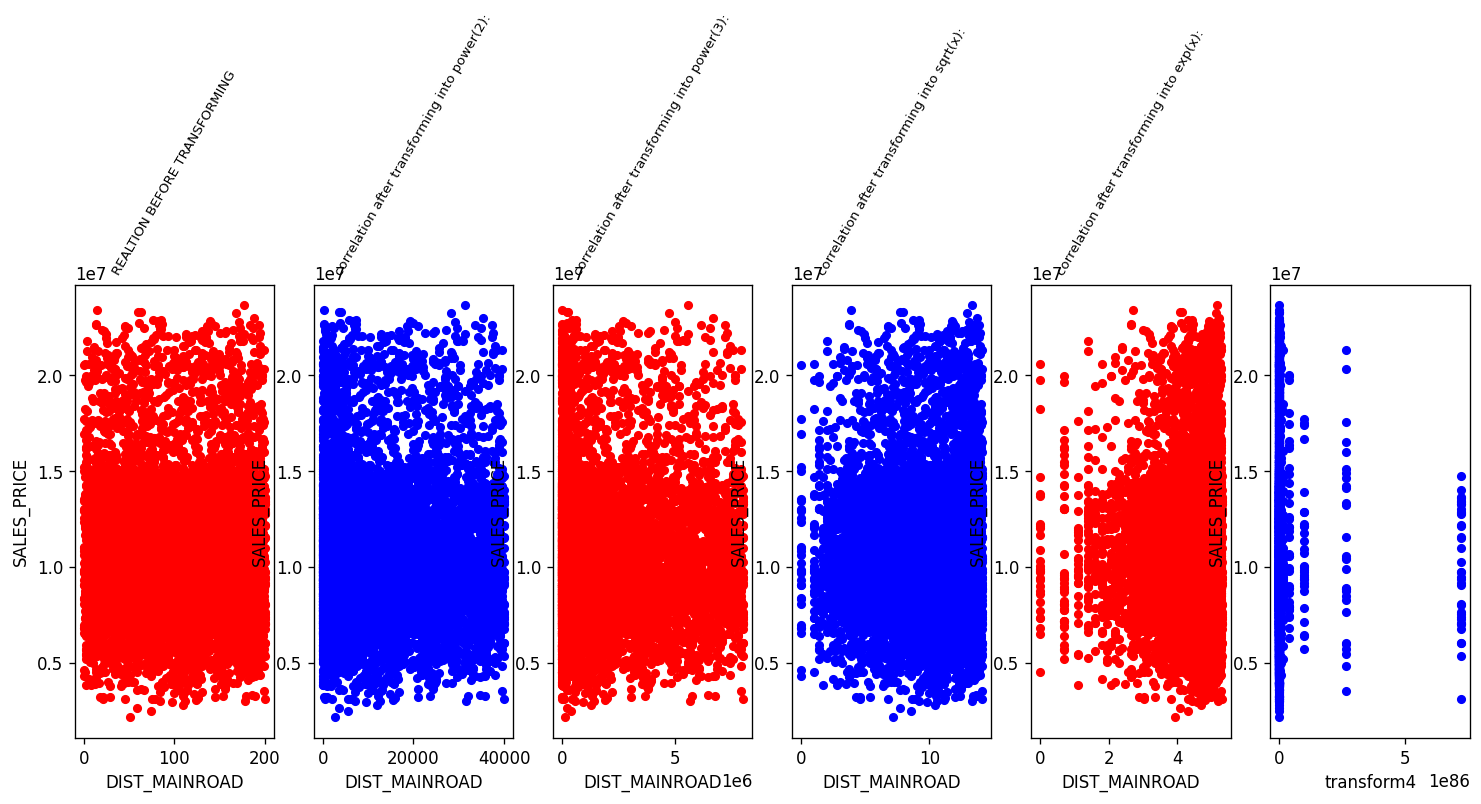

In [ ]:
correlation("DIST_MAINROAD")
# There was a uniform distribution so we can drop this column

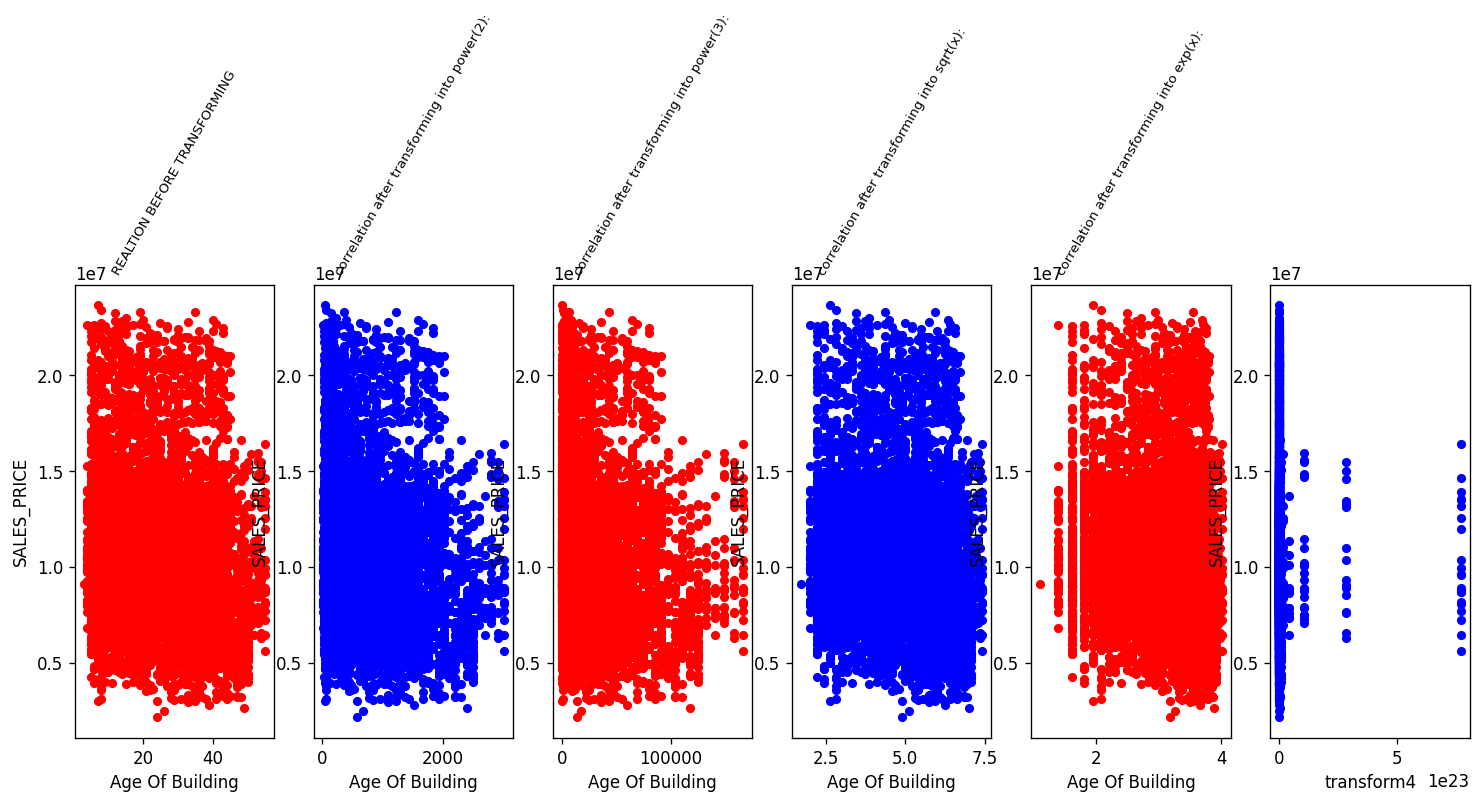

In [ ]:
correlation("Age Of Building")
# There was also no strong relationn between age of building and sales_price as age increases sales price decreases

# CHECKING FOR DISCRETE NUMERICAL COLUMN VS SALES PRICE

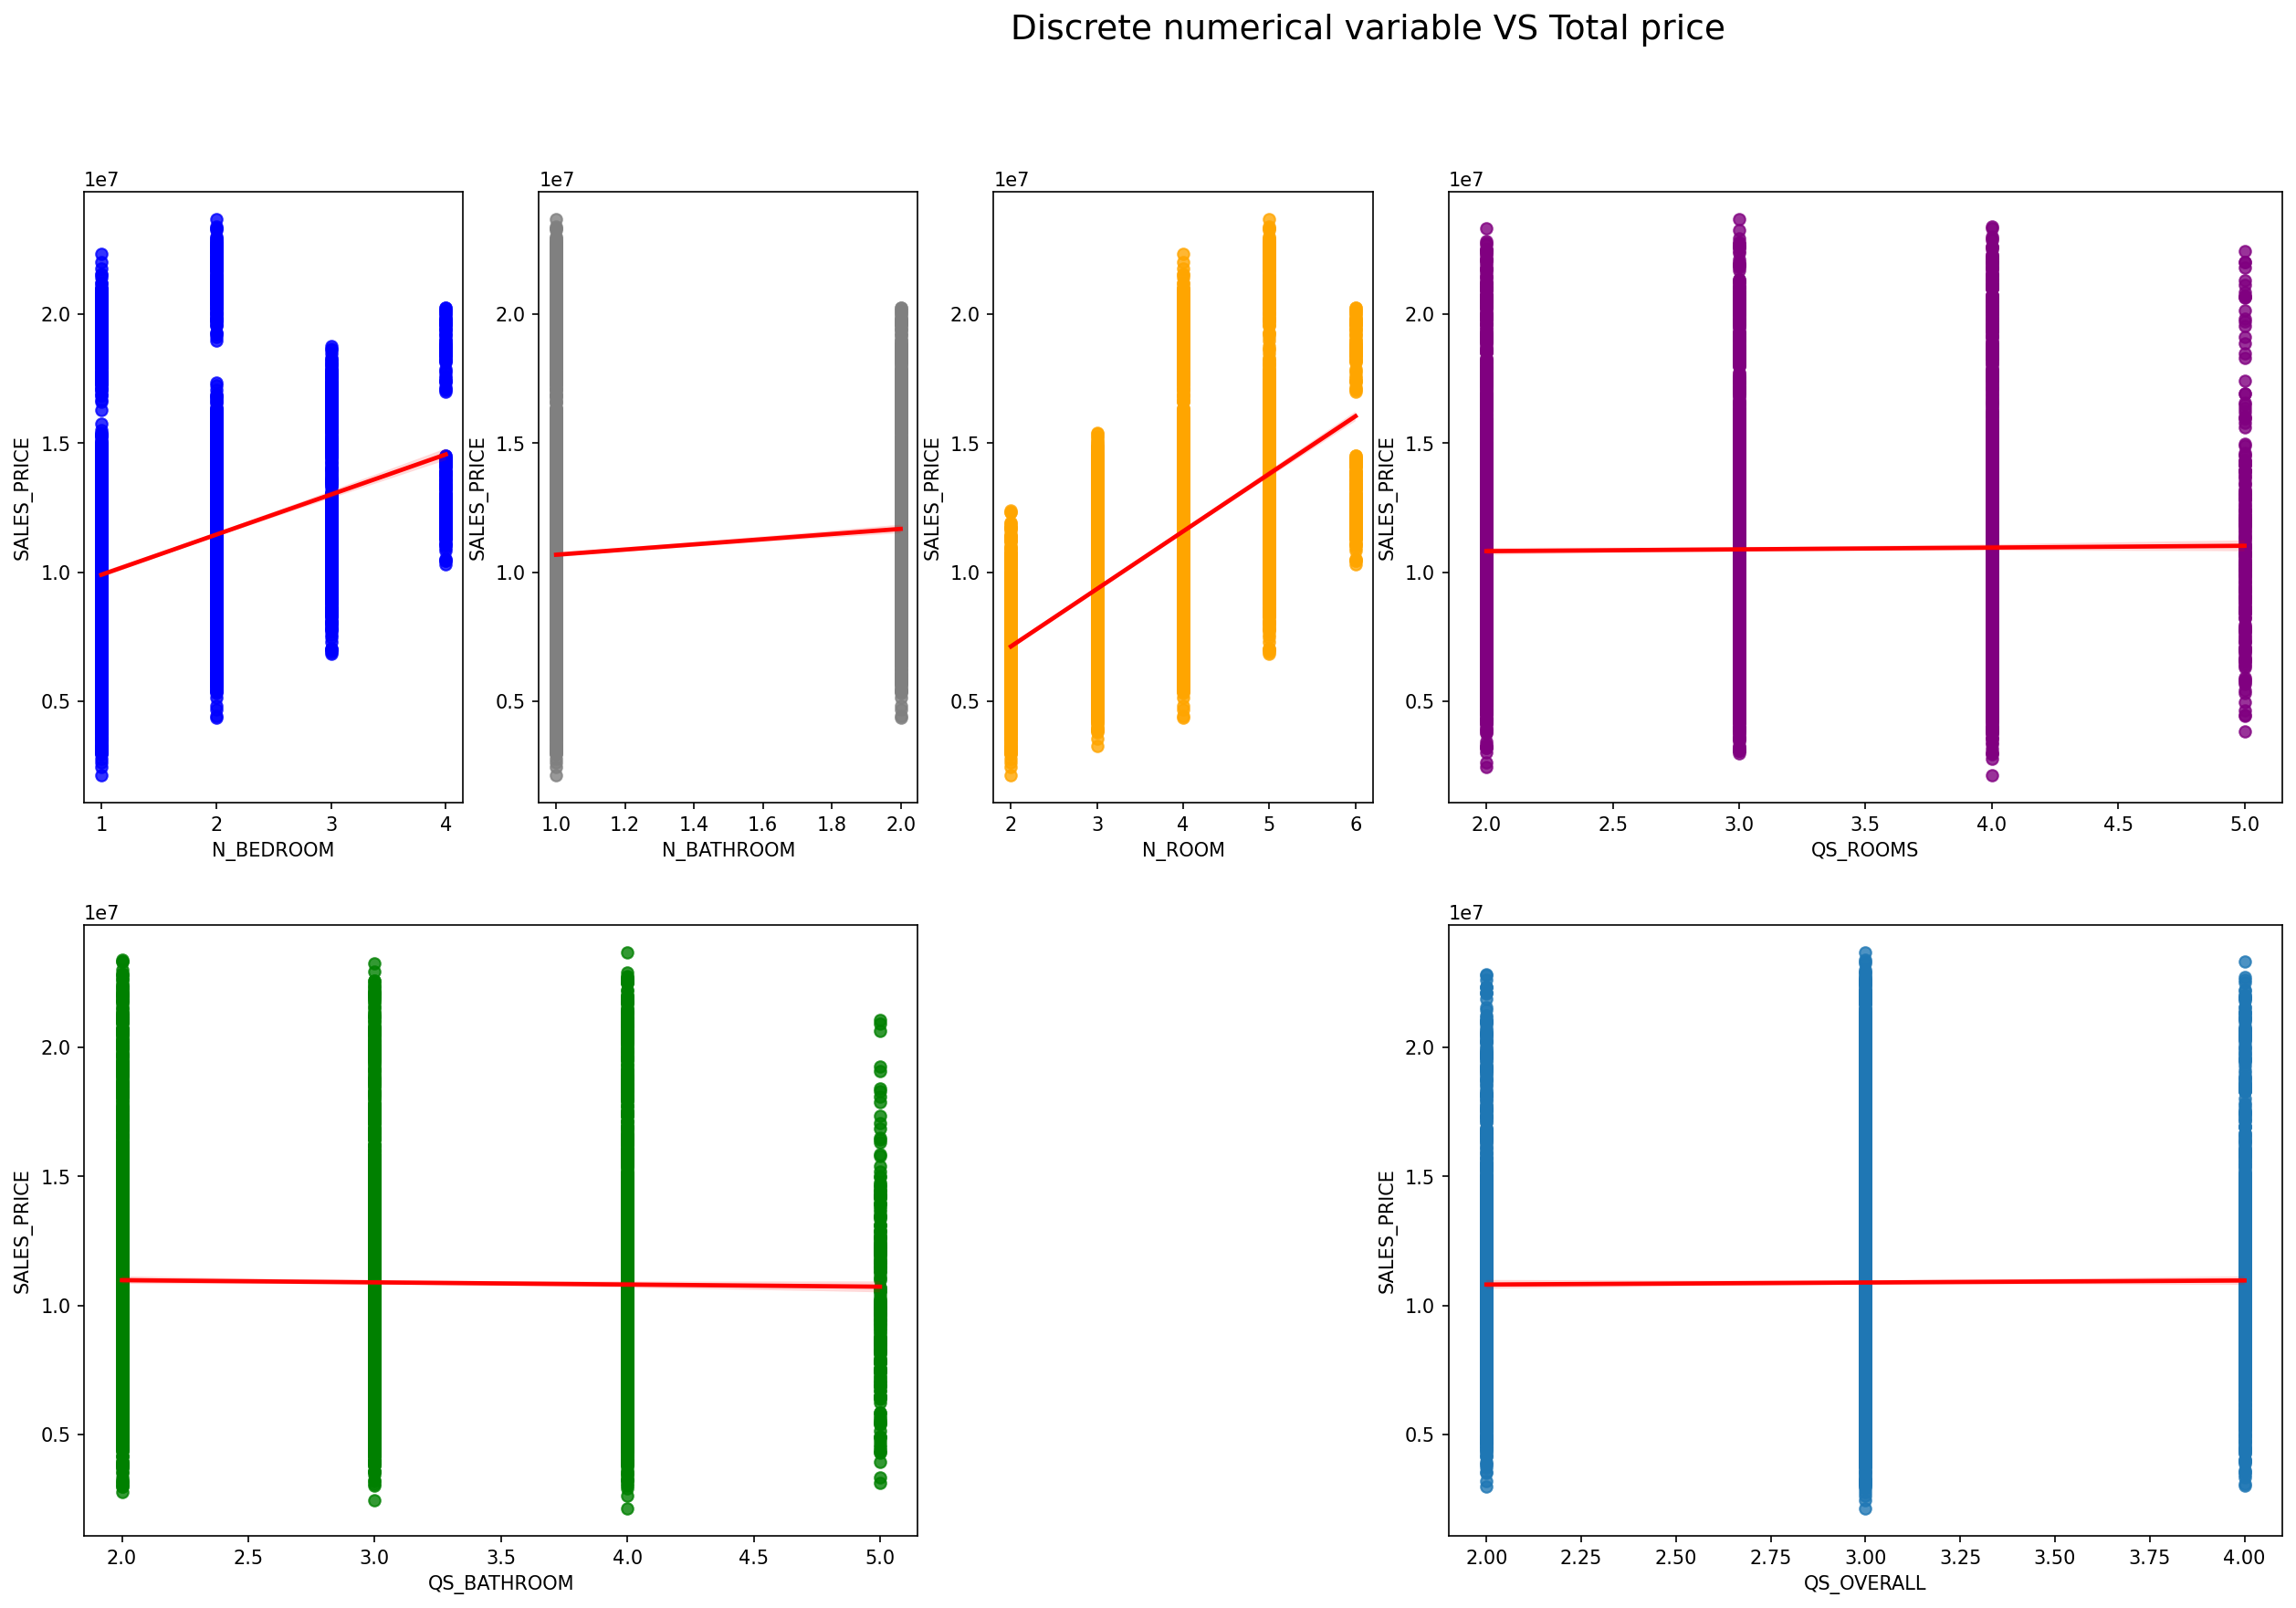

In [ ]:
plt.figure(figsize=(25, 13), dpi=150)
plt.subplot2grid((2,6),(0,0))
sns.regplot(data.N_BEDROOM, data.SALES_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.subplot2grid((2,6),(0,1))
sns.regplot(data.N_BATHROOM, data.SALES_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})
plt.subplot2grid((2,6),(0,2))
sns.regplot(data.N_ROOM, data.SALES_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(data.QS_ROOMS, data.SALES_PRICE, scatter_kws={"color": "purple"}, line_kws={"color": "red"})
plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(data.QS_BATHROOM, data.SALES_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(data.QS_BEDROOM, data.SALES_PRICE, line_kws={"color": "red"})
plt.subplot2grid((2,6),(1,3),colspan=2)
sns.regplot(data.QS_OVERALL, data.SALES_PRICE, line_kws={"color": "red"})
plt.suptitle("Discrete numerical variable VS Total price", fontsize=18)
plt.show()
# AS WE observed here there was no relation ship between QS_room, Qs_bedroom, Qs_bathroom and QS_overall

NOTE : FROM ABOVE ALL DIST_MAINROAD,SALE_COND,QS_ROOMS,QS_BATHROOM,QS_BEDROOM, QS_OVERALL HAS NO RELATION SHIP WITH THE TARGET VARIABLE SO DROPPING THEM

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age Of Building,transform,transform1,transform2,transform3,transform4
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,...,4,3,4,4,7600000,44,1936,85184,6.633250,3.784190,1.285160e+19
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,...,4,4,2,3,21717770,11,121,1331,3.316625,2.397895,5.987414e+04
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,...,4,3,2,3,13159200,20,400,8000,4.472136,2.995732,4.851652e+08
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSeWa,Paved,...,4,3,3,4,9630290,22,484,10648,4.690416,3.091042,3.584913e+09
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,...,3,2,4,3,7406250,30,900,27000,5.477226,3.401197,1.068647e+13


In [100]:
data.drop(["DIST_MAINROAD","SALE_COND","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"],axis=1,inplace=True)

In [101]:
data.dtypes

AREA               object
INT_SQFT            int64
N_BEDROOM           int64
N_BATHROOM          int64
N_ROOM              int64
PARK_FACIL         object
BUILDTYPE          object
UTILITY_AVAIL      object
STREET             object
MZZONE             object
SALES_PRICE         int64
Age Of Building     int64
dtype: object

#ENCODING OF CATEGORICAL COLUMNS

In [102]:
data["AREA"] = data["AREA"].map({"Karapakkam":1,"Adyar":2,"Chrompet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"T Nagar":7})
data["MZZONE"] = data["MZZONE"].map({"A":1,"C":2,"I":3,"RH":4,"RL":5,"RM":6})
data["UTILITY_AVAIL"] = data["UTILITY_AVAIL"].map({"ELO":1,"NoSeWa":2,"NoSewr":3,"AllPub":4})
data["STREET"] = data["STREET"].map({"No Access":1,"Paved":2,"Gravel":3})
data["PARK_FACIL"] = data["PARK_FACIL"].map({"Yes":1,"No":0})
data = pd.get_dummies(data,columns=["BUILDTYPE"])

In [103]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,Age Of Building,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,1,4,2,1,7600000,44,1,0,0
1,6,1986,2,1,5,0,4,3,4,21717770,11,1,0,0
2,2,909,1,1,3,1,1,3,5,13159200,20,1,0,0
3,4,1855,3,2,5,0,2,2,3,9630290,22,0,0,1
4,1,1226,1,1,3,1,4,3,2,7406250,30,0,0,1


In [104]:
data["BUILDTYPE_Commercial"] = data["BUILDTYPE_Commercial"].astype("int")
data["BUILDTYPE_House"] = data["BUILDTYPE_House"].astype("int")
data["BUILDTYPE_Others"] = data["BUILDTYPE_Others"].astype("int")

In [105]:
data.dtypes

AREA                    int64
INT_SQFT                int64
N_BEDROOM               int64
N_BATHROOM              int64
N_ROOM                  int64
PARK_FACIL              int64
UTILITY_AVAIL           int64
STREET                  int64
MZZONE                  int64
SALES_PRICE             int64
Age Of Building         int64
BUILDTYPE_Commercial    int64
BUILDTYPE_House         int64
BUILDTYPE_Others        int64
dtype: object

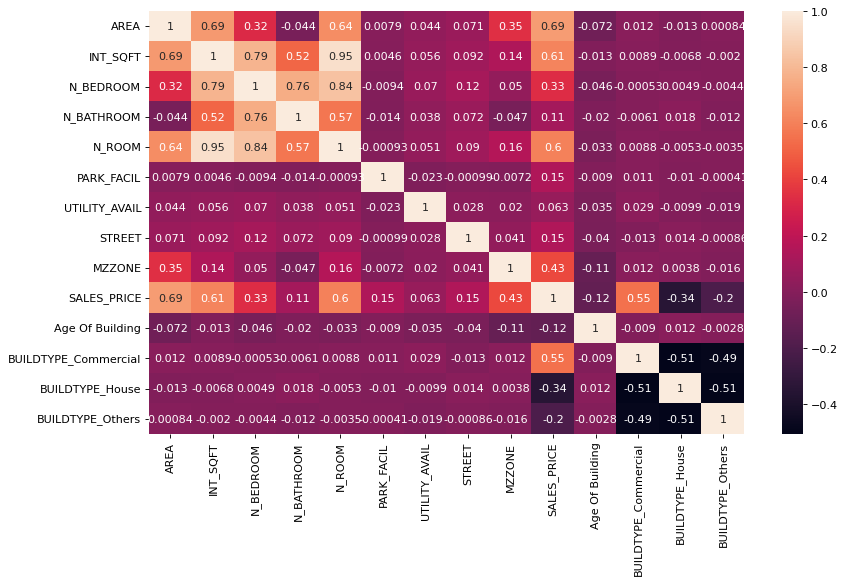

In [ ]:
plt.figure(figsize=(12,7),dpi=80)
sns.heatmap(data.corr(),annot=True)

#SPLITTING OF DATA

In [106]:
X = data.drop("SALES_PRICE",axis=1)
y = data["SALES_PRICE"]

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#SCALING OF DATA

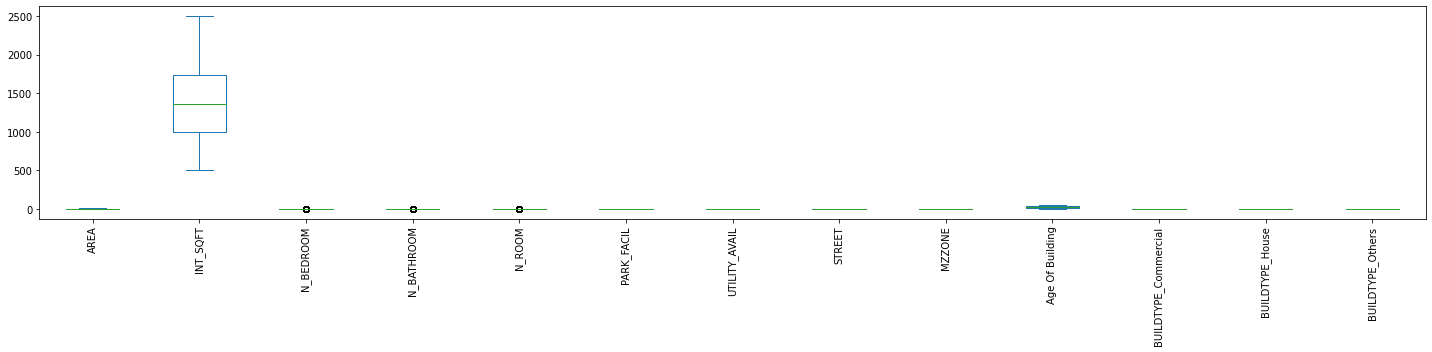

In [ ]:
pd.DataFrame(X_train,columns = X_train.columns).plot.box(figsize=(20,5),rot=90)
plt.tight_layout()
plt.show()
# As we observe here INT_SQFT column has larger values comparing with other column

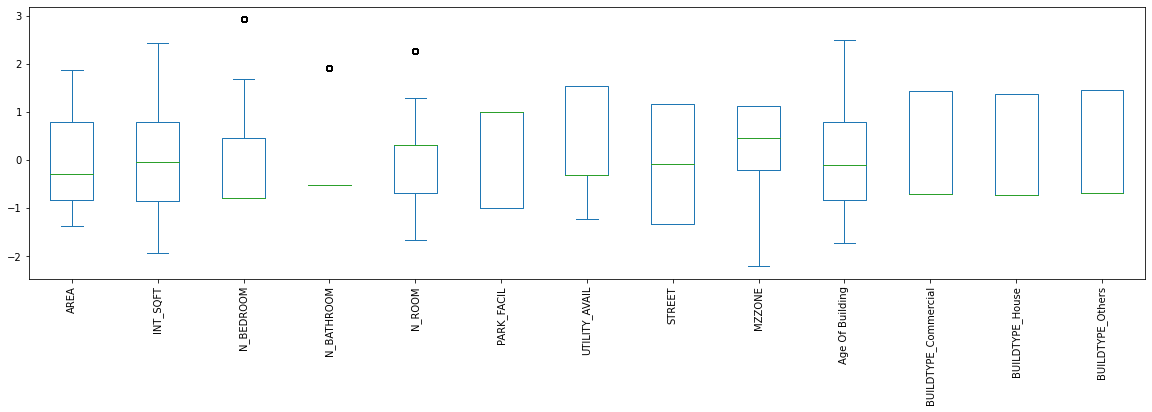

In [112]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
pd.DataFrame(X_train_scale,columns=X_train.columns).plot.box(figsize=(20,5),rot=90)
plt.show()
#after scaling the train values are equal

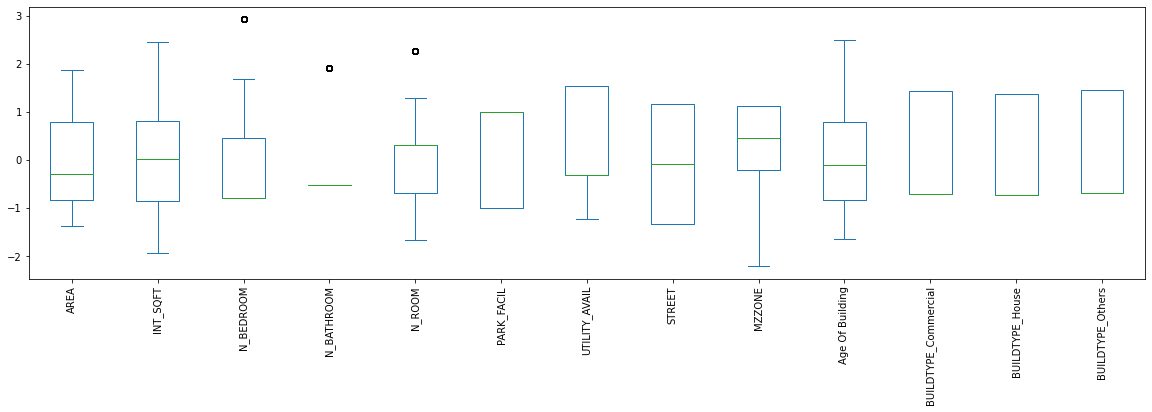

In [ ]:
pd.DataFrame(X_test_scale,columns=X_test.columns).plot.box(figsize=(20,5),rot=90)
plt.show()
#after scaling the test values are in the same range

#MODEL TRAINING, FROM HERE MODEL TRAINING WILL START FOR DIFFERENT REGRESSION TECHNIQUES

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn import tree
import xgboost as xgb

# LINEAR REGRESSION MODEL

NORMAL DATA

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)
print(lr.intercept_)

-901412.3052891418


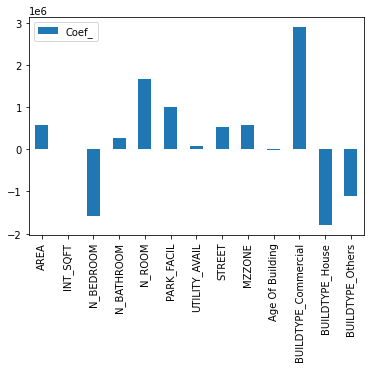

In [ ]:
cdf = pd.DataFrame(lr.coef_,X.columns,columns=['Coef_'])
cdf.plot(kind="bar")
# As we observe here some are strong positive & strong negative relation with sales_price

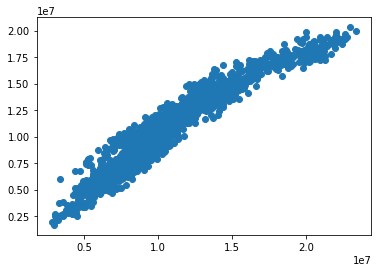

In [ ]:
plt.scatter(y_test,lr_predict)
# As we observe that there was a linear relation ship between the features with target variables

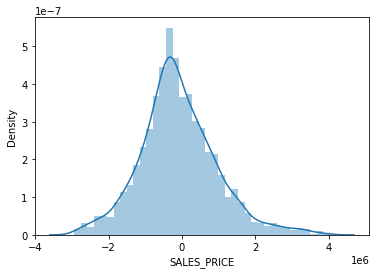

In [ ]:
sns.distplot(y_test-lr_predict)

In [ ]:
print("r2_score",metrics.r2_score(y_test,lr_predict))
print("MAE:",metrics.mean_absolute_error(y_test,lr_predict))
print("MSE:",metrics.mean_squared_error(y_test,lr_predict))
print("SMSE:",np.sqrt(metrics.mean_squared_error(y_test,lr_predict)))

r2_score 0.9177763684056661
MAE: 808346.9062476181
MSE: 1114249505087.8027
SMSE: 1055580.174637532


SCALED DATA

In [ ]:
lr1 = LinearRegression()
lr1.fit(X_train_scale,y_train)
lr1_predict = lr1.predict(X_test_scale)
print(lr1.intercept_)

10919618.151375184


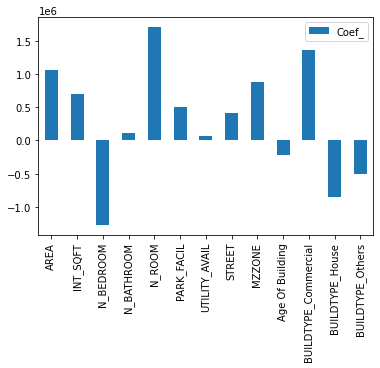

In [ ]:
cdf = pd.DataFrame(lr1.coef_,X.columns,columns=['Coef_'])
cdf.plot(kind="bar")
# After scaling there was a high correlation with the target variables

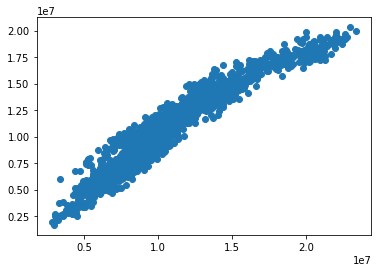

In [ ]:
plt.scatter(y_test,lr1_predict)

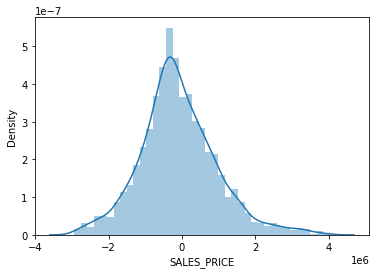

In [ ]:
sns.distplot(y_test-lr1_predict)

In [ ]:
print("r2_score",metrics.r2_score(y_test,lr1_predict))
print("MAE:",metrics.mean_absolute_error(y_test,lr1_predict))
print("MSE:",metrics.mean_squared_error(y_test,lr1_predict))
print("SMSE:",np.sqrt(metrics.mean_squared_error(y_test,lr1_predict)))

r2_score 0.9177763684056661
MAE: 808346.906247617
MSE: 1114249505087.803
SMSE: 1055580.174637532


NOTE : BOTH NORMAL & SCALING DATA GIVES SAME R2_SCORE : 0.9177763684056661 ,0.9177763684056661

#KNN(K-NEAREST NEIGHBOURS REGRESSOR)
-> KNN is lazy algorithm and scaling is mandatory where we use distance matrix, so we are not fitting the data for normal data trying for scaling data.

NORMAL DATA

In [ ]:
for i in range(1,40):
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train_scale,y_train)#training the model
  print("K value  : " , i, " train score : ", knn.score(X_train_scale,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scale, y_train, cv=10)))
# so when k is 4 cross_val_score is highest so we can go with that

K value  :  1  train score :  1.0  score :  0.9338762731446153
K value  :  2  train score :  0.9841747980466489  score :  0.948710432056304
K value  :  3  train score :  0.9783413953990523  score :  0.9514819407601302
K value  :  4  train score :  0.9743199623280626  score :  0.9530371038455359
K value  :  5  train score :  0.9711978069988213  score :  0.9529309009526117
K value  :  6  train score :  0.9688419757721999  score :  0.9521729405503491
K value  :  7  train score :  0.9667310416908723  score :  0.9513727137096903
K value  :  8  train score :  0.964599132971633  score :  0.9502717350783323
K value  :  9  train score :  0.9626094623276245  score :  0.9489995427463244
K value  :  10  train score :  0.961029756717189  score :  0.9479581944638105
K value  :  11  train score :  0.9591963843218696  score :  0.946412857716967
K value  :  12  train score :  0.957361002744813  score :  0.945262622087291
K value  :  13  train score :  0.9557509325911357  score :  0.9441204093951414
K v

In [ ]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)
print("r2_score",metrics.r2_score(y_test,knn_predict))

r2_score 0.3634307943592703


TUNING THE MODEL

In [ ]:
leaf_size = list(range(1,20))
n_neighbors = list(range(1,20))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
best_model.best_params_
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

{'leaf_size': 9, 'n_neighbors': 6, 'p': 1}

r2_score 0.5659095906968128


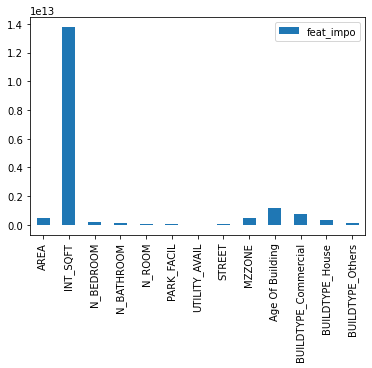

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.inspection import permutation_importance
knn1 = KNeighborsRegressor(leaf_size=9,n_neighbors=6,p=1)
knn1.fit(X_train,y_train)
knn1_predict = knn1.predict(X_test)
print("r2_score",metrics.r2_score(y_test,knn1_predict))
results = permutation_importance(knn1, X_train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
cdf = pd.DataFrame(importance,X.columns,columns=["feat_impo"])
cdf.plot(kind="bar")
#Here we can observe the important features

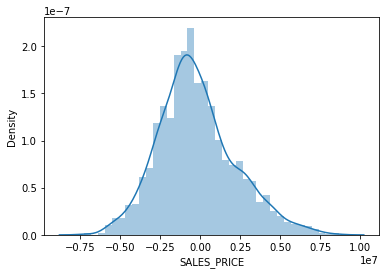

In [ ]:
sns.distplot(y_test-knn1_predict)

SACLING DATA

In [ ]:
knn2 = KNeighborsRegressor(n_neighbors=4)
knn2.fit(X_train_scale,y_train)
knn2_predict = knn2.predict(X_test_scale)
print("r2_score",metrics.r2_score(y_test,knn2_predict))

r2_score 0.9543663252370224


TUNING THE SCALING DATA 

In [ ]:
leaf_size = list(range(1,20))
n_neighbors = list(range(1,20))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_scale,y_train)
#Print The value of best Hyperparameters
best_model.best_params_

{'leaf_size': 1, 'n_neighbors': 6, 'p': 1}

r2_score 0.9648527405911187


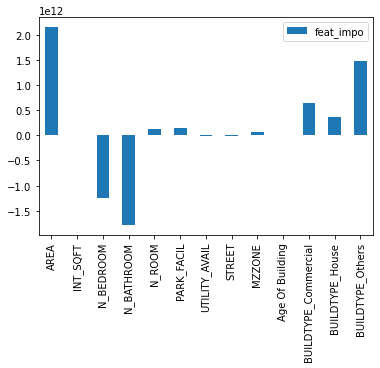

In [ ]:
knn3 = KNeighborsRegressor(leaf_size=1,n_neighbors=6,p=1)
knn3.fit(X_train_scale,y_train)
knn3_predict = knn3.predict(X_test_scale)
print("r2_score",metrics.r2_score(y_test,knn3_predict))
results = permutation_importance(knn3, X_train, y_train, scoring='neg_mean_squared_error')
importance1 = results.importances_mean
cdf = pd.DataFrame(importance1,X.columns,columns=["feat_impo"])
cdf.plot(kind="bar")
# After scaling it was taking more feature importance for a particular features

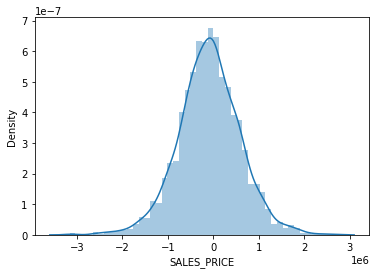

In [ ]:
sns.distplot(y_test-knn3_predict)

NOTE : AFTER TUNING THE MODEL KNN ALGORITHMS IS GIVING THE BEST R2SCORES FOR NORMAL & SCALED DATA : 0.5659095906968128, 0.9648527405911187

# DECISION TREE REGRESSOR 

-> In DTR QUESTIONS ARE THE NODES AND DECISIONS ARE THE LEAVES BY TAKING LOW MAX DEPTH OVERFITTING WILL REDUCE, DECISION TREE IS A BASE ALGORITHM FOR RANDOM FOREST

NORMAL DATA

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = r2_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeRegressor(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring = make_scorer(r2_score)) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth : ",depth, " Train R2 : ",trainAccuracy, " Val Score : ", np.mean(valAccuracy))

Depth :  1  Train R2 :  0.367069263979255  Val Score :  0.3624498458305435
Depth :  2  Train R2 :  0.6959008417768979  Val Score :  0.6930712991325256
Depth :  3  Train R2 :  0.8079486890428145  Val Score :  0.8041218148188308
Depth :  4  Train R2 :  0.8901538571605768  Val Score :  0.8832971223522919
Depth :  5  Train R2 :  0.923666747145696  Val Score :  0.9137272990519933
Depth :  6  Train R2 :  0.945101948454717  Val Score :  0.9357316430963891
Depth :  7  Train R2 :  0.9605732608370121  Val Score :  0.9482377521277462
Depth :  8  Train R2 :  0.9732983574531539  Val Score :  0.9578536453747853
Depth :  9  Train R2 :  0.9830828554055279  Val Score :  0.9642311486317519
Depth :  10  Train R2 :  0.9898991353820631  Val Score :  0.9679965704768122
Depth :  20  Train R2 :  0.9999995436608393  Val Score :  0.9700957252072777
Depth :  40  Train R2 :  1.0  Val Score :  0.9700399722939709
Depth :  60  Train R2 :  1.0  Val Score :  0.9701475100140792


In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
print("R2_score",metrics.r2_score(y_test,dt_predict))

R2_score 0.9711814985455913


TUNING THE MODEL

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
dtt = DecisionTreeRegressor()
dtt_tuning = GridSearchCV(dtt,param_grid=parameters,scoring=make_scorer(r2_score),cv=3,verbose=3)
best_one = dtt_tuning.fit(X_train,y_train)
best_one.best_params_

r2_score 0.973569545933357


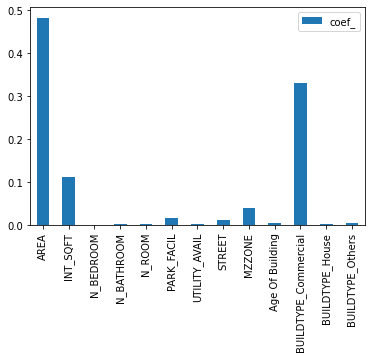

In [ ]:
dtt1 = DecisionTreeRegressor(max_depth=12,min_samples_leaf=3,splitter='best')
dtt1.fit(X_train,y_train)
dtt1_predict = dtt1.predict(X_test)
print("r2_score",metrics.r2_score(y_test,dtt1_predict))
important = dtt1.feature_importances_
cdf = pd.DataFrame(important,X.columns,columns=["coef_"])
cdf.plot(kind="bar")

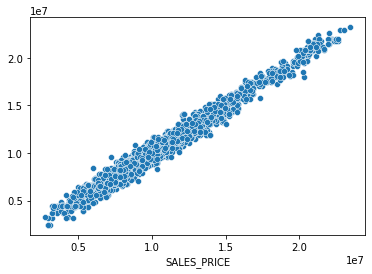

In [ ]:
sns.scatterplot(y_test,dtt1_predict)

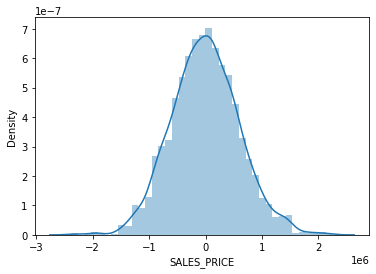

In [ ]:
sns.distplot(y_test-dtt1_predict)

SCALING DATA

In [ ]:
dtt2 = DecisionTreeRegressor()
dtt2.fit(X_train_scale,y_train)
dtt2_predict = dtt2.predict(X_test_scale)
print("R2_SCORE",metrics.r2_score(y_test,dtt2_predict))

R2_SCORE 0.9713031526074095


TUNING THE MODEL FOR SCALING DATA

In [ ]:
dtt2_tuning = DecisionTreeRegressor()
dt_tuning = GridSearchCV(dtt2_tuning,param_grid=parameters,scoring=make_scorer(r2_score),cv=3,verbose=3)
best_ones = dt_tuning.fit(X_train_scale,y_train)
best_ones.best_params_

r2_score 0.972844353831556


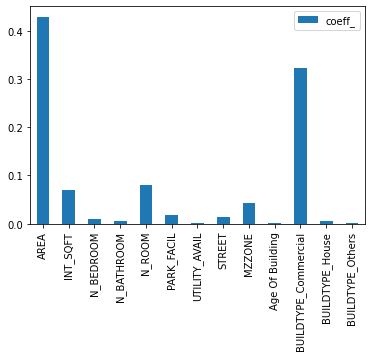

In [ ]:
dtt3 = DecisionTreeRegressor(max_depth=12,max_features='auto',min_samples_leaf=2,splitter='random')
dtt3.fit(X_train_scale,y_train)
dtt3_predict = dtt3.predict(X_test_scale)
print("r2_score",metrics.r2_score(y_test,dtt3_predict))
impor = dtt3.feature_importances_
cd = pd.DataFrame(impor,X.columns,columns=['coeff_']) 
cd.plot(kind='bar')

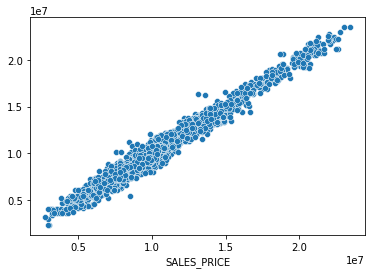

In [ ]:
sns.scatterplot(y_test,dtt3_predict)

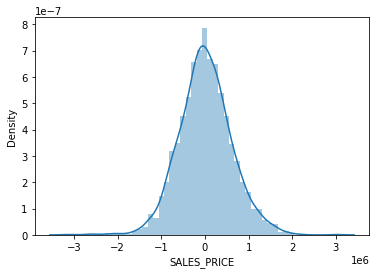

In [ ]:
sns.distplot(y_test-dtt3_predict)

AFTER TUNING THE SCORE FOR NORMAL & SCALED DATA : 0.9736606808103119, 0.9758349641963276.

#RANDOMFOREST REGRESSOR

-> IT FOLLOWS ENSEMBLE LEARNING APPROACH(COLLECTION OF MULTIPLE DECISION TREES), IT CONVERT THE HIGH VARIANCE DIFFERENCE INTO LOW VARIANCE DIFFERENCE.

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)
print("r2_score",metrics.r2_score(y_test,rf_predict))

r2_score 0.9882128955443314


TUNING NORMAL DATA

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=1300,stop=1500,num=6)]
max_features = ["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(start=7,stop=30,num=4)]
min_samples_split = [5,10,15,100]
random_grid = {"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,"min_samples_split":min_samples_split}
rf_random = RandomizedSearchCV(rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
rf_random.fit(X_train,y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 1380,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 30}

r2_score 0.9877252595766693


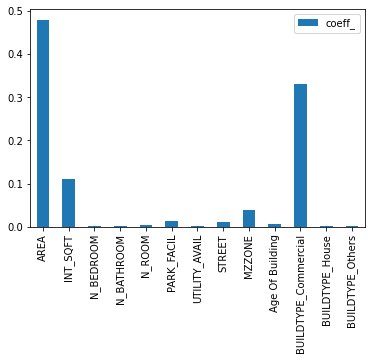

In [ ]:
rf1 = RandomForestRegressor(n_estimators=1380,min_samples_split=5,max_features='auto',max_depth=22)
rf1.fit(X_train,y_train)
rf1_predict = rf1.predict(X_test)
print("r2_score",metrics.r2_score(y_test,rf1_predict))
impor = rf1.feature_importances_
cd = pd.DataFrame(impor,X.columns,columns=['coeff_']) 
cd.plot(kind='bar')

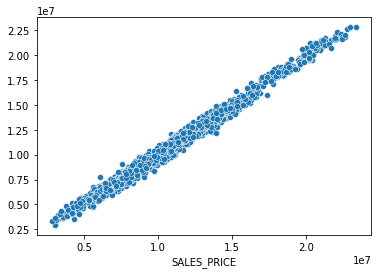

In [ ]:
sns.scatterplot(y_test,rf1_predict)

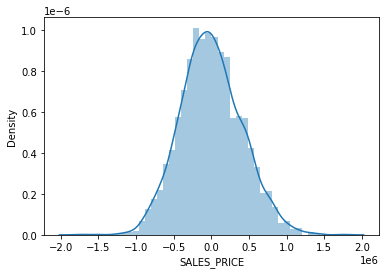

In [ ]:
sns.distplot(y_test-rf1_predict)

SCALING DATA

In [ ]:
rff = RandomForestRegressor()
rff.fit(X_train_scale,y_train)
rff_predict = rff.predict(X_test_scale)
print("r2_score",metrics.r2_score(y_test,rff_predict))

r2_score 0.9880989157529012


TUNING SCALED DATA

In [ ]:
rf_random = RandomizedSearchCV(rff,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
rf_random.fit(X_train_scale,y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 1340,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 14}

r2_score 0.9876500298902743


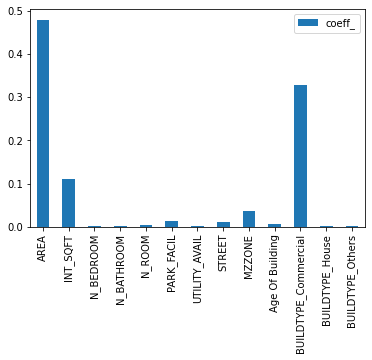

In [ ]:
rf2 = RandomForestRegressor(n_estimators=1380,min_samples_split=5,max_features='auto',max_depth=22)
rf2.fit(X_train_scale,y_train)
rf2_predict = rf2.predict(X_test_scale)
print("r2_score",metrics.r2_score(y_test,rf2_predict))
impor = rf2.feature_importances_
cd = pd.DataFrame(impor,X.columns,columns=['coeff_']) 
cd.plot(kind='bar')

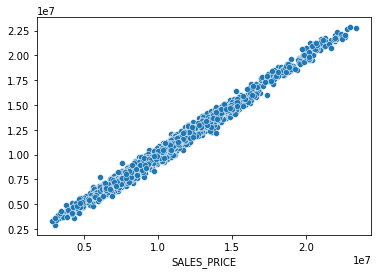

In [ ]:
sns.scatterplot(y_test,rf2_predict)

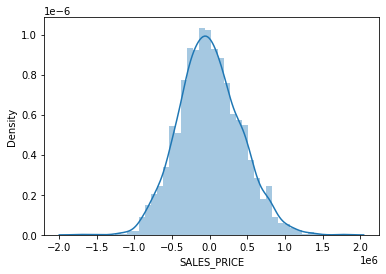

In [ ]:
sns.distplot(y_test-rf2_predict)

AFTER TUNING THE SCORES OF BOTH NORMAL & SCALED DATA: 0.9877363800998469, 0.9847309062232918

#XG BOOST REGRESSOR

-> IT IS THE BEST MACHINE LEARNING MODEL WHICH GIVES HIGH ACCURACY

NORMAL DATA

In [111]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  #model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.360252992233137  Cross-Val score :  -0.3740454158329899
Learning rate :  0.02  Train score :  0.7503925734310692  Cross-Val score :  0.7454338720862065
Learning rate :  0.03  Train score :  0.92595954909072  Cross-Val score :  0.9227485788028348
Learning rate :  0.04  Train score :  0.9627045835276897  Cross-Val score :  0.9600153410595006
Learning rate :  0.05  Train score :  0.9746786928625762  Cross-Val score :  0.9721441016061088
Learning rate :  0.06  Train score :  0.9799476592096511  Cross-Val score :  0.9781614402256731
Learning rate :  0.07  Train score :  0.9847696135002789  Cross-Val score :  0.9823908167668856
Learning rate :  0.08  Train score :  0.9876001899126656  Cross-Val score :  0.9853246569460197
Learning rate :  0.09  Train score :  0.9897017991195431  Cross-Val score :  0.9874829733651438
Learning rate :  0.1  Train score :  0.9905602964711246  Cross-Val score :  0.9890500549225323
Learning rate :  0.11  Train score :  0.99

0.993422681910908


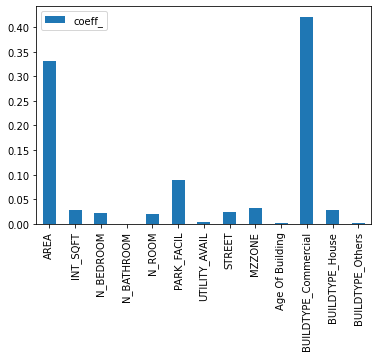

In [113]:
model = xgb.XGBRegressor(learning_rate=0.7,n_estimators=100,verbosity=0)
model.fit(X_train,y_train)
y_predict_xgb = model.predict(X_test)
print(metrics.r2_score(y_test,y_predict_xgb))
impor = model.feature_importances_
cd = pd.DataFrame(impor,X.columns,columns=['coeff_']) 
cd.plot(kind='bar')

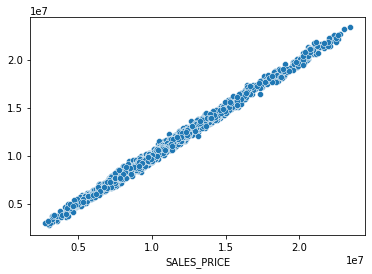

In [ ]:
sns.scatterplot(y_test,y_predict_xgb)

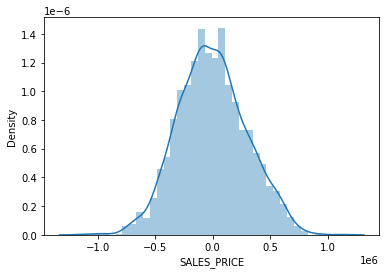

In [ ]:
sns.distplot(y_test-y_predict_xgb)

SCALED DATA

0.9934248994458357


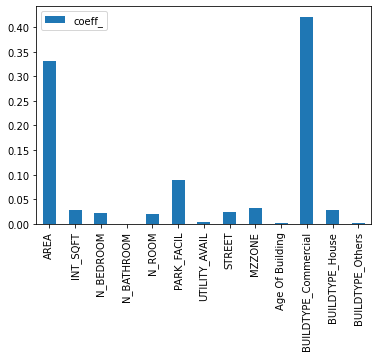

In [ ]:
model1 = xgb.XGBRegressor(learning_rate=0.7,n_estimators=100,verbosity=0)
model1.fit(X_train_scale,y_train)
y_predict_xgb = model1.predict(X_test_scale)
print(metrics.r2_score(y_test,y_predict_xgb))
impor = model1.feature_importances_
cd = pd.DataFrame(impor,X.columns,columns=['coeff_']) 
cd.plot(kind='bar')

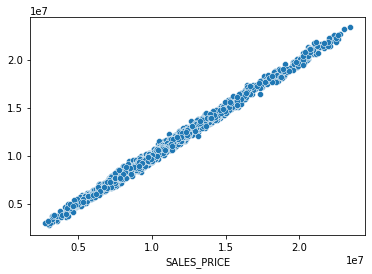

In [ ]:
sns.scatterplot(y_test,y_predict_xgb)

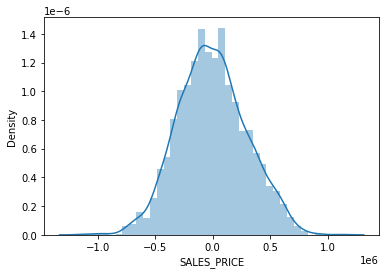

In [ ]:
sns.distplot(y_test-y_predict_xgb)

 THE SCORESS THAT XGB IS GIVING IS 0.993422681910908, 0.9934248994458357

In [114]:
# creating a dataframe for all machine learning models with their scores
modell = pd.DataFrame(columns=["MODEL NAME","NORMAL DATA AFTER TUNING","SCALING DATA AFTER TUNING"])
modell = modell.append({'MODEL NAME':'Linear Regression',"NORMAL DATA AFTER TUNING":0.9177763684056661,"SCALING DATA AFTER TUNING":0.9177763684056661},ignore_index=True)
modell = modell.append({'MODEL NAME':'Knn',"NORMAL DATA AFTER TUNING":0.5659095906968128,"SCALING DATA AFTER TUNING":0.9648527405911187},ignore_index=True)
modell = modell.append({'MODEL NAME':'DecisionTreeRegressor',"NORMAL DATA AFTER TUNING":0.9736606808103119,"SCALING DATA AFTER TUNING":0.9758349641963276},ignore_index=True)
modell = modell.append({'MODEL NAME':'RandomForestRegressor',"NORMAL DATA AFTER TUNING":0.9877363800998469,"SCALING DATA AFTER TUNING": 0.9847309062232918},ignore_index=True)
modell = modell.append({'MODEL NAME':"XGBoost Regressor","NORMAL DATA AFTER TUNING":0.993422681910908,"SCALING DATA AFTER TUNING":0.9934248994458357},ignore_index=True)

In [ ]:
modell

,MODEL NAME,NORMAL DATA AFTER TUNING,SCALING DATA AFTER TUNING
0,Linear Regression,0.917776,0.917776
1,Knn,0.565910,0.964853
2,DecisionTreeRegressor,0.973661,0.975835
3,RandomForestRegressor,0.987736,0.984731
4,XGBoost Regressor,0.993423,0.993425


NOTE : FROM ALL THE MODELS XG BOOST IS GIVING HIGH R2_SCORE SO THIS WAS THE BEST MODEL FOR THIS DATA TO PREDICT THE SALES PRICE

IMPORTANT FEATURES FOR XGBOOST IS : 

                      coeff_
AREA                    0.33
INT_SQFT                0.03
N_BEDROOM               0.02
N_BATHROOM              0.00
N_ROOM                  0.02
PARK_FACIL              0.09
UTILITY_AVAIL           0.00
STREET                  0.02
MZZONE                  0.03
Age Of Building         0.00
BUILDTYPE_Commercial    0.42
BUILDTYPE_House         0.03
BUILDTYPE_Others        0.00


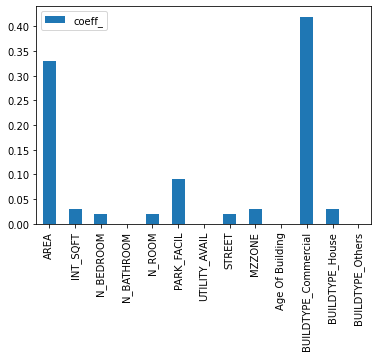

In [122]:
impor = model.feature_importances_
cd = pd.DataFrame((np.round(impor,2)),X.columns,columns=['coeff_']) 
print(cd)
cd.plot(kind='bar')

In [123]:
X1 = data[["AREA","INT_SQFT","N_BEDROOM","N_ROOM","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","Age Of Building","BUILDTYPE_Commercial","BUILDTYPE_House"]].values
y1 = data["SALES_PRICE"].values

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [125]:
# scaling the features
scaler.fit(X_train,y_train)
X_train_scale1 = scaler.transform(X_train)
X_test_scale1 = scaler.transform(X_test)

In [126]:
xg1 = xgb.XGBRegressor(learning_rate=0.7,n_estimators=100,verbosity=0)
xg1.fit(X_train,y_train)
y_predict_xgb1 = xg1.predict(X_test)
print(metrics.r2_score(y_test,y_predict_xgb1))

0.9936344311059788


In [127]:
xg2 = xgb.XGBRegressor(learning_rate=0.7,n_estimators=100,verbosity=0)
xg2.fit(X_train_scale1,y_train)
y_predict_xgb = xg2.predict(X_test_scale1)
print(metrics.r2_score(y_test,y_predict_xgb))

0.9936327667899968


THE IMPORTANT FEATURES IN XG BOOST REGRESSOR IS GIVING HIGHEST R2_SCORE

In [128]:
# creating a dataframe to convert it into excel file
d_column = pd.DataFrame(data[["AREA","INT_SQFT","N_BEDROOM","N_ROOM","PARK_FACIL","MZZONE","STREET","UTILITY_AVAIL","Age Of Building","BUILDTYPE_Commercial","BUILDTYPE_House","SALES_PRICE"]])
d_column.head()

,AREA,INT_SQFT,N_BEDROOM,N_ROOM,PARK_FACIL,MZZONE,STREET,UTILITY_AVAIL,Age Of Building,BUILDTYPE_Commercial,BUILDTYPE_House,SALES_PRICE
0,1,1004,1,3,1,1,2,4,44,1,0,7600000
1,6,1986,2,5,0,4,3,4,11,1,0,21717770
2,2,909,1,3,1,5,3,1,20,1,0,13159200
3,4,1855,3,5,0,3,2,2,22,0,0,9630290
4,1,1226,1,3,1,2,3,4,30,0,0,7406250


In [149]:
d_column["UTILITY_AVAIL"].value_counts()

2    3700
4    1887
1    1522
Name: UTILITY_AVAIL, dtype: int64

In [162]:
# converting to excel
d_column.to_excel("Chennai_house_price.xlsx",index=False)

In [148]:
#"AREA","INT_SQFT","N_BEDROOM","N_ROOM","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","Age Of Building","BUILDTYPE_Commercial","BUILDTYPE_House"]]
int(xg1.predict([[6,1084,2,4,1,7,2,6,26,1,0]]))

16958770

In [ ]:
X2 = d_column.drop("SALES_PRICE",axis=1)

In [ ]:
# creating pickle file
import pickle
with open("chennai_house_model.pickle",'wb') as f:
  pickle.dump(xg1,f)

In [ ]:
# creating json file
import json
columns = {'data_columns':[col.lower() for col in X2.columns]
}
with open("columns.json",'w') as f:
  f.write(json.dumps(columns))

DEPLOYING A MACHINE LEARNING MODELS USING STREAMLIT

In [167]:
%%writefile app.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import streamlit as st 
import xgboost as xgb
data = pd.read_excel("/content/Chennai_house_price.xlsx")
X1 = data[["AREA","INT_SQFT","N_BEDROOM","N_ROOM","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","Age Of Building","BUILDTYPE_Commercial","BUILDTYPE_House"]].values
y1 = data["SALES_PRICE"].values
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
std = StandardScaler()
x_train = std.fit_transform(X_train)
x_test = std.transform(X_test)
xg1 = xgb.XGBRegressor(learning_rate=0.7,n_estimators=100,verbosity=0)
xg1.fit(x_train,y_train)
# streamlit code
st.title("CHENNAI-HOUSE-PRICE-PREDICTION")
st.image("/content/sample_data/Housepriceprediction.jpg")
dict = {"Karapakkam":1,"Adyar":2,"Chrompet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"T Nagar":7}
st.json(dict)
a1=st.selectbox("SELECT AREA",[1,2,3,4,5,6])
a2=st.number_input("ENTER AREA IN SQFT")
a3=st.radio("NO OF BED_ROOMS",[1,2,3,4])
a4=st.slider("NO OF ROOM",min_value=1,max_value=6,step=1)
dict1 = {"YES":1,"NO":1}
st.json(dict1)
a5=st.selectbox("SELECT PARK_FACIL",[1,0])
dict2= {"ELO":1,"NoSeWa":2,"AllPub":4}
st.json(dict2)
a6= st.selectbox("SELECT UTILITY_AVAIL",[1,2,4])
dict3 = {"No Access":1,"Paved":2,"Gravel":3}
st.json(dict3)
a7 = st.selectbox("SELECT STREET",[1,2,3])
dict4 = {"A":1,"C":2,"I":3,"RH":4,"RL":5,"RM":6}
st.json(dict4)
a8 = st.selectbox("SELECT MZZONE",[1,2,3,4,5,6])
a9 = st.number_input("ENTER AGE OF BUILDING")
st.json(dict1)
a10 = st.selectbox("SELECT BUILDTYPE_COMMERICAL",[1,0])
st.json(dict1)
a11 = st.selectbox("SELECT BUILDTYPE_HOUSE",[1,0])
if st.button("CLICK HERE TO PREDICT THE PRICE"):
  st.write("THE PREDICTED HOUSE MODEL IS:")
  st.header(*xg1.predict([[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11]]))
  st.markdown(':sunglasses:')
  st.balloons()

Overwriting app.py


In [168]:
!streamlit run app.py & npx localtunnel --port 8501

2022-10-03 07:28:41.820 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
[############......] - refresh-package-json:localtunnel: timing action:finalize

npx: installed 22 in 3.804s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.133.54.205:8501

your url is: https://orange-clocks-tan-34-133-54-205.loca.lt
  Stopping...
^C


In [ ]:
data["AREA"] = data["AREA"].map({"Karapakkam":1,"Adyar":2,"Chrompet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"T Nagar":7})
data["MZZONE"] = data["MZZONE"].map({"A":1,"C":2,"I":3,"RH":4,"RL":5,"RM":6})
data["UTILITY_AVAIL"] = data["UTILITY_AVAIL"].map({"ELO":1,"NoSeWa":2,"NoSewr":3,"AllPub":4})
data["STREET"] = data["STREET"].map({"No Access":1,"Paved":2,"Gravel":3})
data["PARK_FACIL"] = data["PARK_FACIL"].map({"Yes":1,"No":0})

In [134]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 5.2 MB/s 
     |████████████████████████████████| 78 kB 6.8 MB/s 
     |████████████████████████████████| 4.7 MB 44.0 MB/s 
     |████████████████████████████████| 164 kB 66.7 MB/s 
     |████████████████████████████████| 181 kB 66.2 MB/s 
     |████████████████████████████████| 237 kB 78.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 51 kB 6.9 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=e28d754677c9c239b004c76254bf02862d3e9f414cf5f0b81f535b7de0d19c61
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


ML MODEL WITH DLASK SERVER

In [ ]:
from flask import Flask, request, jsonify
import json
import pickle
import numpy as np
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn
class price(object):
  __locations=None
  __data_columns=None
  __model=None
  
  def load_saved_artifacts():
    print("loading saved artifacts...start")
    global __data_columns
    global __locations
    global __model
  with open("/content/columns.json",'r') as f:
      __data_columns = json.load(f)['data_columns']
      __locations = __data_columns[0]
  with open("/content/chennai_house_model.pickle",'rb') as f:
      __model = pickle.load(f)
  print("loading saved artifacts was done...")
  def get_estimated_price(area,int_sqft,n_bedroom,n_rooms,park_facil,mzzone,street,utility_avail,age,buildtype_commercial,buildtype_house):
    return int(__model.predict([[area,int_sqft,n_bedroom,n_rooms,park_facil,mzzone,street,utility_avail,age,buildtype_commercial,buildtype_house]]))
  def get_buildtype_names():
    return __locations

app = FastAPI()
@app.route("/get_buildtype_names")
async def get_buildtype_names():
    response = jsonify({
        'buildtype': price.get_buildtype_names()
    })
    response.headers.add('Access-Control-Allow-Origin','*')

    return response
@app.route('/predict_home_price')
async def predict_home_price():
  area = int(request.form['area'])
  int_sqft = int(request.form['int_sqft'])
  n_bedroom = int(request.form['n_bedroom'])
  n_rooms = int(request.form['n_rooms'])
  park_facil = int(request.form['park_facil'])
  mzzone = int(request.form['mzzone'])
  street = int(request.form['street'])
  utility_avail = int(request.form['utility_avail'])
  age = int(request.form['age'])
  buildtype_commercial = int(request.form['buildtype_commercial'])
  buildtype_house = int(request.form['buildtype_house'])
  
  response = jsonify({
      'estimated_price': price.get_estimated_price(area,int_sqft,n_bedroom,n_rooms,park_facil,mzzone,street,utility_avail,age,buildtype_commercial,buildtype_house)
  })

  response.headers.add('Access-Control-Allow-Origin','*')

  return response
ngrok_tunnel = ngrok.connect(5000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=5000)
